In [99]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

  <h1>
      <p style="font-size:18pt">COMP0198: Machine Learning with Applications in Finance - Assignment - Part 1</p>
  </h1>

From assignment brief:

There are 25 variables and 30,000 rows of data.  
The variables have the following meaning:  
• X0: ID of the customer   
• X1: Amount of the given credit (NT dollar): it includes individual consumer credit and family (supplementary) credit.  
• X2: Gender (1 = male; 2 = female).  
• X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
• X4: Marital status (1 = married; 2 = single; 3 = others).  
• X5: Age (in years).  
• X6 - X11: History of past payments. The past monthly payment records (from April to September 2005) are as follows: X6 = the repayment status in September 2005; X7 = the repayment status in August 2005; . . .; X11 = the repayment status in April 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
• X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September 2005; X13 = amount of bill statement in August 2005; . . .; X17 = amount of bill statement in April 2005.  
• X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .; X23 = amount paid in April, 2005.  
• X24: The default on payment in the next month (Yes =1; No = 1)  

# Data exploration

In [2]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [3]:
# Loading the data
df = pd.read_csv('default_of_credit_card_clients.csv')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# Eliminating the top row of the dataframe which simply numbers the features as it is dispensable
df = pd.read_csv('default_of_credit_card_clients.csv', skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Naming the target variable more intuitively to allow for easier coding
df.rename(columns={'default payment next month':'default_result'}, inplace=True)
# Renaming PAY_0 to PAY_1 to match rest of column labels relating to 'PAY'
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
# checking data type and whether there is any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              30000 non-null  int64
 1   LIMIT_BAL       30000 non-null  int64
 2   SEX             30000 non-null  int64
 3   EDUCATION       30000 non-null  int64
 4   MARRIAGE        30000 non-null  int64
 5   AGE             30000 non-null  int64
 6   PAY_1           30000 non-null  int64
 7   PAY_2           30000 non-null  int64
 8   PAY_3           30000 non-null  int64
 9   PAY_4           30000 non-null  int64
 10  PAY_5           30000 non-null  int64
 11  PAY_6           30000 non-null  int64
 12  BILL_AMT1       30000 non-null  int64
 13  BILL_AMT2       30000 non-null  int64
 14  BILL_AMT3       30000 non-null  int64
 15  BILL_AMT4       30000 non-null  int64
 16  BILL_AMT5       30000 non-null  int64
 17  BILL_AMT6       30000 non-null  int64
 18  PAY_AMT1        30000 non-

In [7]:
# separating the explanatory variables from the index and the target variable, this gives 23 explanatory variables as there are 25 variables in total
explanatory_variables = df.columns[0:23] 
explanatory_variables_list = list(explanatory_variables)
type(explanatory_variables_list)
print(explanatory_variables_list)
print(len(explanatory_variables_list))
#print(len(explanatory_variables.tolist))
df[explanatory_variables_list].describe().T

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']
23


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
# checking how many values there are in each category for variable 'PAY_1'
df['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [9]:
# checking how many values there are in each category for variable 'PAY_2'
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

Inspecting the table above can lead to various observations. At first glance, the 'MARRIAGE' variable in the dataset seems to not only have categories 1, 2 and but also 0. The 'EDUCATION' variable has not only categories 1-4 but also 0 and 6. Furthermore, the 'PAY_X' variables seem to also include categories -2 however only goes until category 8 as opposed to 9 as specified by the information provided about the dataset. Deductions must be made on these observations that seem to be anomalies therefore further inspection must be undertaken. Furthermore, there is a different amount of values for each 'PAY_X' variable, which is something to be checked. 'SEX' has 2 different values, which aligns with the description of the dataset, therefore no issue lies there. 'AGE' does not have to be inspected as it is a continuous variable and the number 56 simply indicates that there are 56 different ages that were recorded. 'LIMIT_BAL', 'BILL_AMTX' and 'PAY_AMTX' does not need investigation due to the fact that there are numerical values. The value of 2 for default result indicated that the classification is binary (0 - not defaulted, 1 - defaulted). However looking at the table formed using the describe() method, some values seem to be negative of which the indication should be deduced at a later stage.

Firstly, the unique elements must be investigated. It is also important to notice that 'BILL_AMTX' has negative values of which the meaning must be understood.

In [10]:
# check the number of unique and distinct elements for each category within the dataframe
df.nunique()

ID                30000
LIMIT_BAL            81
SEX                   2
EDUCATION             7
MARRIAGE              4
AGE                  56
PAY_1                11
PAY_2                11
PAY_3                11
PAY_4                11
PAY_5                10
PAY_6                10
BILL_AMT1         22723
BILL_AMT2         22346
BILL_AMT3         22026
BILL_AMT4         21548
BILL_AMT5         21010
BILL_AMT6         20604
PAY_AMT1           7943
PAY_AMT2           7899
PAY_AMT3           7518
PAY_AMT4           6937
PAY_AMT5           6897
PAY_AMT6           6939
default_result        2
dtype: int64

In [11]:
# checking how many unique categories exist within each variable
# checking 'EDUCATION' variable
education_unique = df['EDUCATION'].unique()
print("Unique 'EDUCATION' categories:", sorted(education_unique))
# checking 'MARRIAGE' variable
marriage_unique = df['MARRIAGE'].unique()
print("Unique 'MARRIAGE' categories:", sorted(marriage_unique))
# checking 'PAY_X' variables
pay_1_unique = df['PAY_1'].unique()
print("Unique 'PAY_1' categories:", sorted(pay_1_unique))
pay_2_unique = df['PAY_2'].unique()
print("Unique 'PAY_2' categories:", sorted(pay_2_unique))
pay_3_unique = df['PAY_3'].unique()
print("Unique 'PAY_3' categories:", sorted(pay_3_unique))
pay_4_unique = df['PAY_4'].unique()
print("Unique 'PAY_4' categories:", sorted(pay_4_unique))
pay_5_unique = df['PAY_5'].unique()
print("Unique 'PAY_5' categories:", sorted(pay_5_unique))
pay_6_unique = df['PAY_6'].unique()
print("Unique 'PAY_6' categories:", sorted(pay_6_unique))

Unique 'EDUCATION' categories: [0, 1, 2, 3, 4, 5, 6]
Unique 'MARRIAGE' categories: [0, 1, 2, 3]
Unique 'PAY_1' categories: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_2' categories: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_3' categories: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_4' categories: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_5' categories: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
Unique 'PAY_6' categories: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


As previously observed, the 'EDUCATION', 'MARRIAGE' and 'PAY_X' variables do in fact have a differing amount of categories per variable, compared to the information provided by the dataset. In the information provided by the dataset, the 'EDUCATION' variable has 4 categories (1-4), whilst above, it also has categories 0, 5 and 6. Apart from the original categories in the 'MARRIAGE' variable, the variable also has a 0 variable. The 'PAY_X' variables also show to have a differing number of variables, 'PAY_1' - 'PAY_4' have variables -2 till 8, which differs to the data description which stated that 0-9 categories existed. 'PAY_5' has variables -2 till 8 but excludes 1. Onwards from this point, it is necessary to plot the data distribution to be able to understand how to do preprocess and handle the data prior to building the models.

In [12]:
df.index = df['ID'] # making the index the same as the 'ID' column
df.drop('ID',axis=1,inplace=True) # getting rid of original 'ID' column
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [13]:
# checking whether there are any missing values
df.isnull().sum() 

LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
default_result    0
dtype: int64

There are no missing variables within the dataset.

# Distributions of Data

This next section aims to explore the distribution of the data and how various variables are divided, moreover to check whether there is any severe imbalance and whether any of the classes are sparse, this is important so that overfitting and underfitting of the data can be avoided.

<AxesSubplot: >

Text(0.5, 0, 'default_result')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Number of Not Defaulted (0) vs Defaulted (1)')

,count
default_result,
0,23364
1,6636


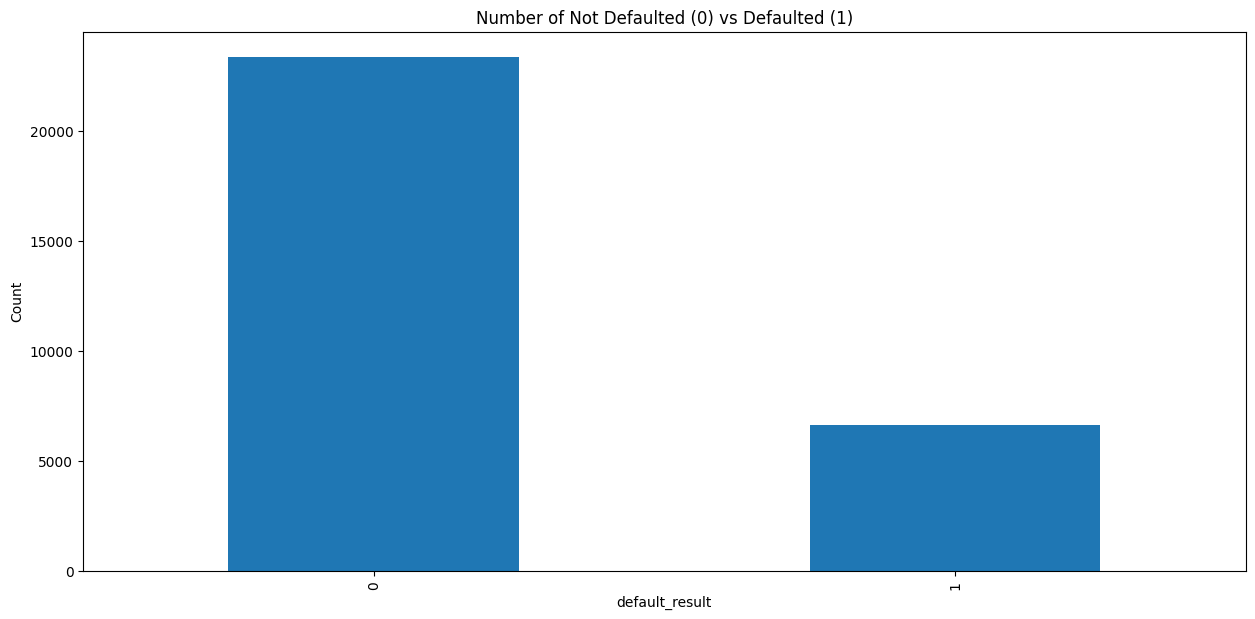

In [112]:
# plotting the amount of defaulted payments and not defaulted payments
df['default_result'].value_counts().plot(kind = 'bar')
plt.xlabel('default_result')
plt.ylabel('Count')
plt.title('Number of Not Defaulted (0) vs Defaulted (1)')
imbalance = df['default_result'].value_counts().rename_axis('default_result').to_frame('count')
imbalance

<AxesSubplot: ylabel='default_result'>

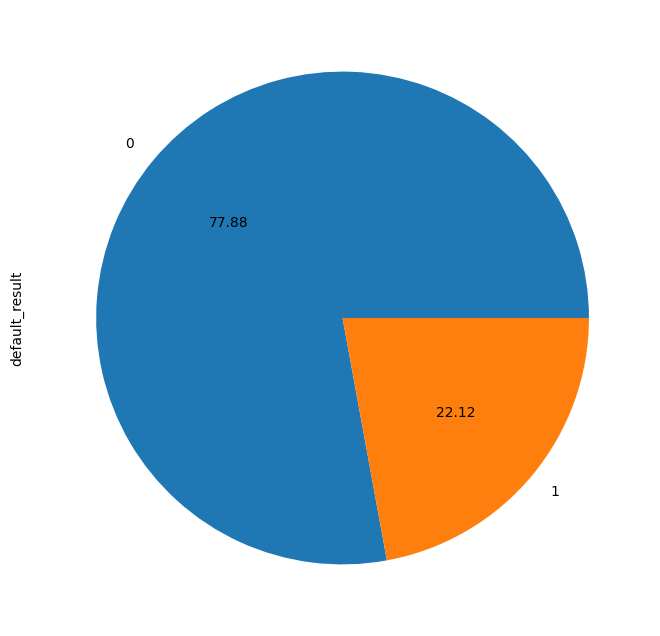

In [113]:
# checking imbalance of dataset, target variable (default)
df['default_result'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')
# imbalanced dataset, 77.88% do not default, 22.12% do default

By normalizing the plotted count against the number of not defaulted and defaulted payments, it is clearly visible that approximately 78% of total credit card customers are expected to not default whilst 22% are expected to deal with. This creates an unbalanced dataset which may have many implications. To overcome this, down/oversampling will be used at a later stage.

default_result,,0,1,Percentage that don't default (0),Percentage that default (1)
SEX,,,,,
1,11888,9015,2873,0.758328,0.241672
2,18112,14349,3763,0.792237,0.207763


default_result,,0,1,Percentage that don't default (0),Percentage that default (1)
EDUCATION,,,,,
0,14,14.0,NaN,NaN,NaN
1,10585,8549.0,2036.0,0.807652,0.192348
2,14030,10700.0,3330.0,0.762651,0.237349
3,4917,3680.0,1237.0,0.748424,0.251576
4,123,116.0,7.0,0.943089,0.056911
5,280,262.0,18.0,0.935714,0.064286
6,51,43.0,8.0,0.843137,0.156863


default_result,,0,1,Percentage that don't default (0),Percentage that default (1)
MARRIAGE,,,,,
0,54,49,5,0.907407,0.092593
1,13659,10453,3206,0.765283,0.234717
2,15964,12623,3341,0.790717,0.209283
3,323,239,84,0.739938,0.260062



'SEX' variable key:
1 - male
2 - female

'EDUCATION' variable key:
1 - graduate school 
2 - university
3 - high school
4 - others

'MARRIAGE' variable key:
1 - married
2 - single
3 - others



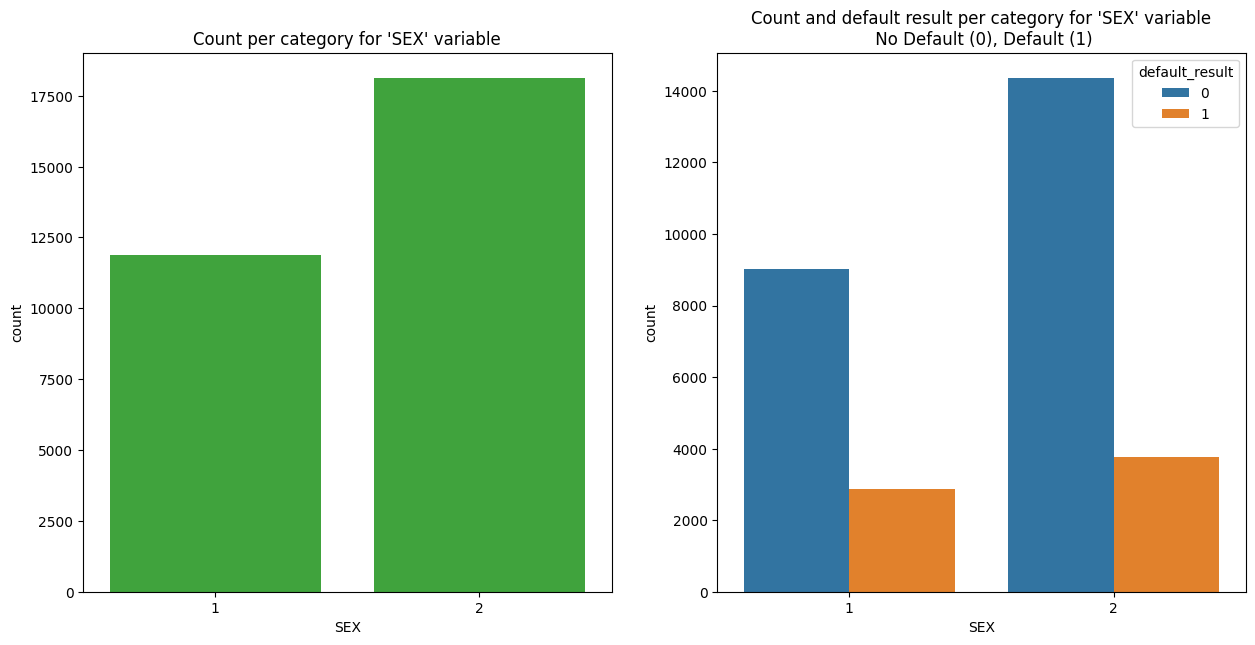

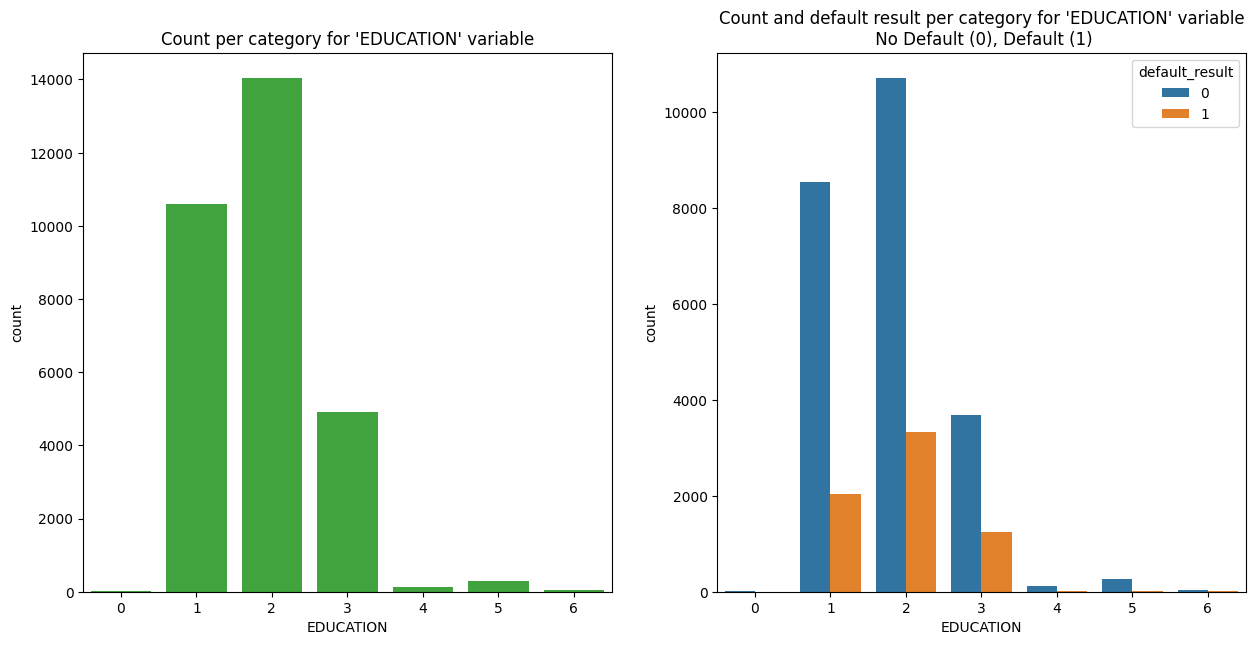

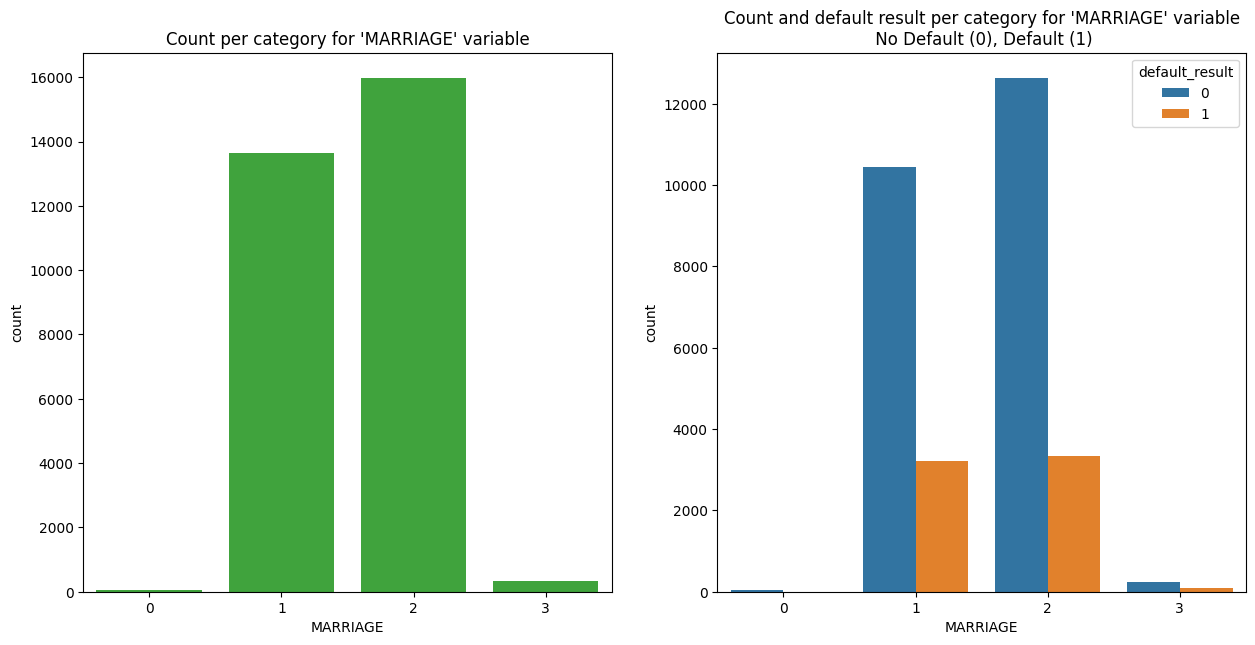

In [114]:
# defining function for barplots to plot the count per variable and count per variable with the default result
def barplot(variable, default):
    fig, ax =plt.subplots(1,2)
    plt.rcParams["figure.figsize"] = [15,7] # setting figure size
    shade = matplotlib.colors.hex2color('#30B42C') # setting colour of bars 
    title1 = "Count per category for \'" + variable + "\' variable"
    title2 = "Count and default result per category for \'" + variable + "\' variable" + "\n No Default (0), Default (1)"
    sns.countplot(x=variable, data=df, color=shade, ax=ax[0]).set(title=title1) # plotting left barplot
    sns.countplot(x=variable, data=df ,hue=default, ax=ax[1]).set(title=title2) # plotting right barplot

# defining function that creates a dataframe summarizing values
def default_perc_calc(variable, default):
    perc = df.groupby([variable, default]).size().unstack() # deparating non-defaults (0) from defaults (1) for select variable
    perc['Percentage that don\'t default (0)'] = (perc[perc.columns[0]]/(perc[perc.columns[0]] + perc[perc.columns[1]])) # calculating percentage of no defaults
    perc['Percentage that default (1)'] = (perc[perc.columns[1]]/(perc[perc.columns[0]] + perc[perc.columns[1]])) # calculating percentage of defaults
    data_plot = df[variable].value_counts() # creating a series of how many values there are per category
    total = data_plot.to_frame().sort_index() # converting the series to a dataframe, sorting index so it aligns correctly with rest of dataframe, otherwise returns values from high to low
    perc.insert(0, '', total) # adding a column to the dataframe with total amount of values for given variable
    return perc

# calling barplot function to plot barplots for each categorical variable
barplot('SEX', 'default_result')
barplot('EDUCATION', 'default_result')
barplot('MARRIAGE', 'default_result')

# calling default_perc_calc to diplay dataframes
default_perc_calc('SEX', 'default_result')
default_perc_calc('EDUCATION', 'default_result')
default_perc_calc('MARRIAGE', 'default_result')

print("""
'SEX' variable key:
1 - male
2 - female

'EDUCATION' variable key:
1 - graduate school 
2 - university
3 - high school
4 - others

'MARRIAGE' variable key:
1 - married
2 - single
3 - others
""")

From the generated plots, a couple of observations can be made:   

'SEX'variable:  
The first plot shows that there are more women than men. It can also be deduced that men are more likely to default showing a chance of 24% of default, whilst women have a 20% chance of default.  

'EDUCATION'variable:  
As previously discovered the actual dataset has a couple of additional categories for the 'EDUCATION' variable. The additional categories are 0, 4, 5 and 6. Since these categories do not have that many instances, they could all be combined into one category named 'other'. It is clear that the most data is from customers that are at university. Looking at the default divide, the customers that are most likely to default are high schoolers. The data clearly shows that they higher the level of education, the less likely the customer is likely to default. 
 
'MARRIAGE'variable:  
The additional unnamed category '0', does not have many instances, therefore it can be combined with the 'other' category. The majority of the data for the 'MARRIAGE' variable is provided by the 'single' category. From the default divide it can be deduced that the 'others' category is most likely to defualt however from the named categories, 'MARRIED' customers are more likely to default as opposed to 'SINGLE'customers, however not much attention shoudl be given to the 'other' variable as it has significantly less data points than 'MARRIED' and 'SINGLE'.


<AxesSubplot: xlabel='AGE'>

Text(0.5, 0, 'AGE')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Plotted count for each age, showing default result divide')

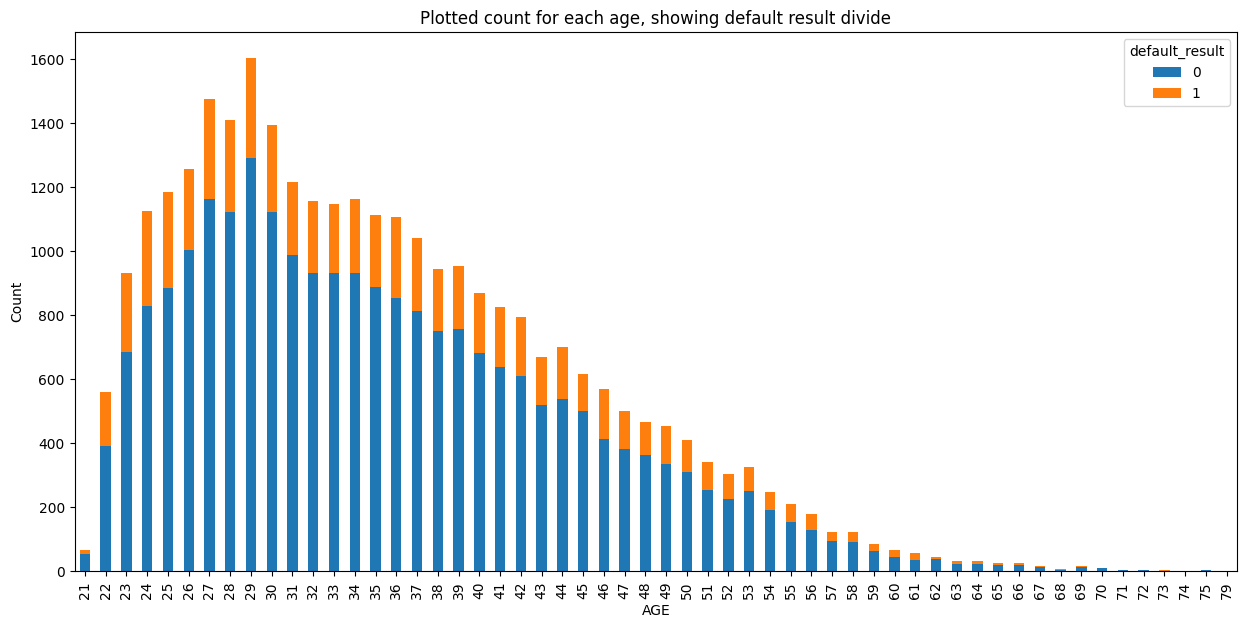

In [115]:
# plotting age to see default per age group
age_plot = df.groupby(['AGE', 'default_result']).size().unstack()
age_plot.plot(kind='bar', stacked=True)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Plotted count for each age, showing default result divide')

The plotted bar plot above for the count of the default result against the 'AGE' variable shows clearly shows that younger peopel have a higher possibility of deafult than older people. The default count significantly decreases and stays low after the age of 60. The highest count for default payment is between the ages 27 and 32. The count increases at first from the ages of 21-30 and then gradually decreases as shown by the plot above. 

(<Figure size 3000x600 with 1 Axes>, <AxesSubplot: >)

/var/folders/z8/zxrt68rx06g1xmphsd1v5ymh0000gn/T/ipykernel_23212/2847053637.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<AxesSubplot: >

/var/folders/z8/zxrt68rx06g1xmphsd1v5ymh0000gn/T/ipykernel_23212/2847053637.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LIMIT_BAL'], kde=True, bins=40)


<AxesSubplot: xlabel='LIMIT_BAL', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Density vs Limit Balance')

<AxesSubplot: >

/var/folders/z8/zxrt68rx06g1xmphsd1v5ymh0000gn/T/ipykernel_23212/2847053637.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'], kde=True, bins=40)


<AxesSubplot: xlabel='AGE', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Density vs Age')

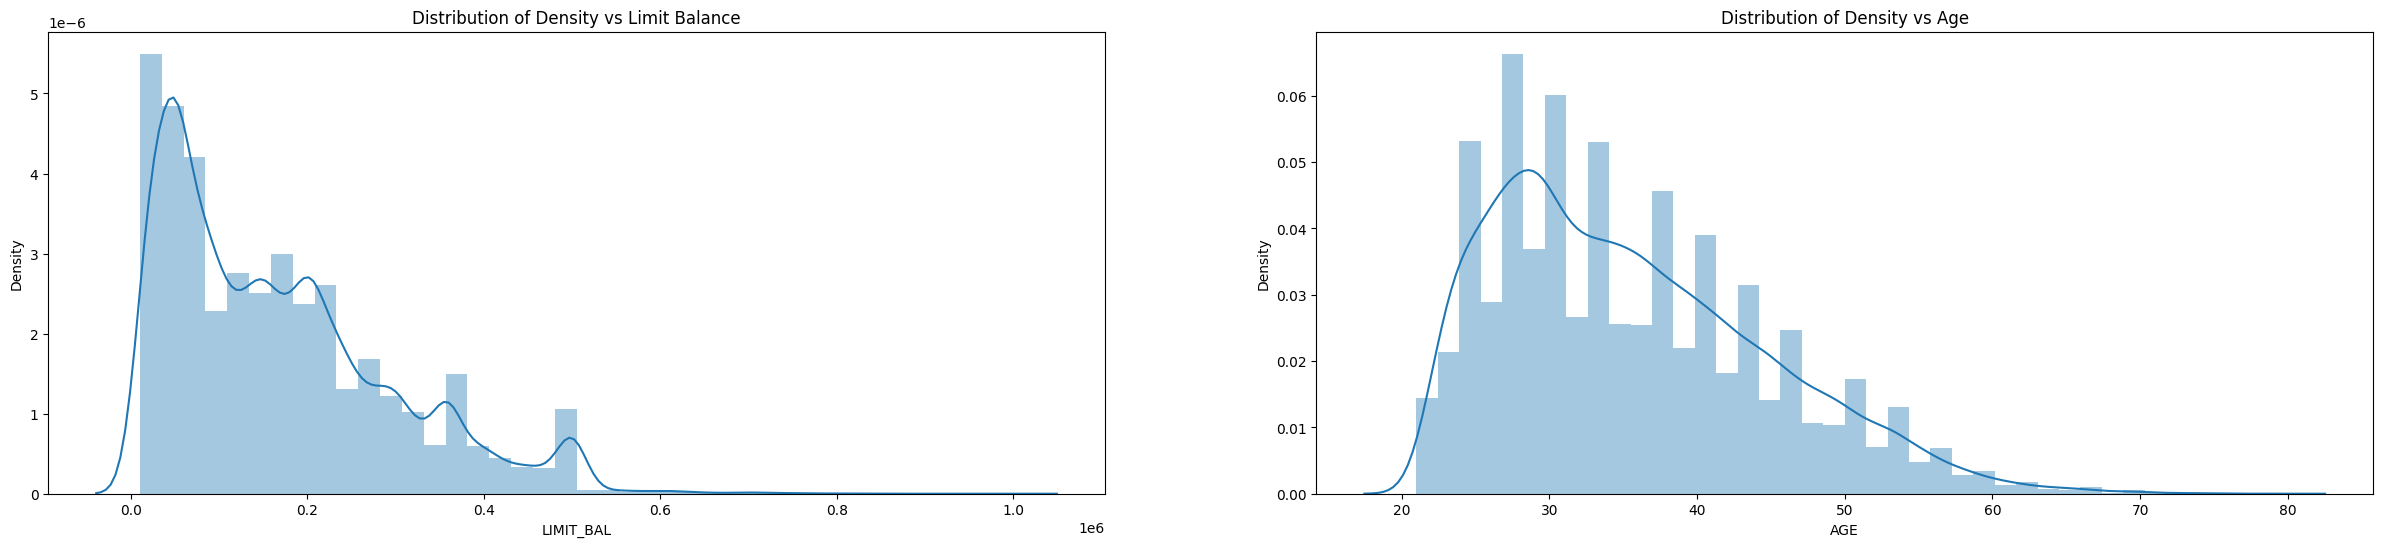

In [116]:
plt.subplots(figsize=(30,6))

# plotting the continuous variable of limit balance to show its density
plt.subplot(121)
sns.distplot(df['LIMIT_BAL'], kde=True, bins=40)
plt.title('Distribution of Density vs Limit Balance')

# plotting the continuous variable of age to show its density
plt.subplot(122)
sns.distplot(df['AGE'], kde=True, bins=40)
plt.title('Distribution of Density vs Age')

plt.show()

The distributions of the continuous variables 'LIMIT_BAL' and 'AGE' show that the data is positively skewed. The two variables also show that they have a similary distribution.

<AxesSubplot: xlabel='AGE', ylabel='LIMIT_BAL'>

Text(0.5, 1.0, "'LIMIT_BAL' vs. 'AGE'")

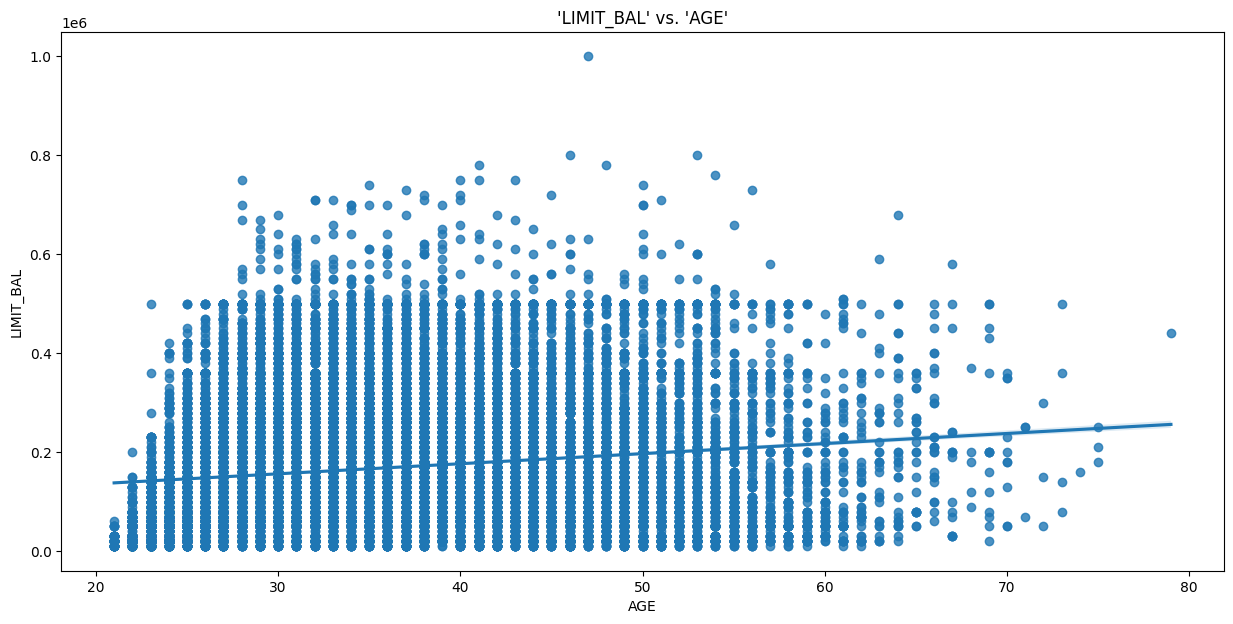

In [117]:
sns.regplot(x='AGE', y='LIMIT_BAL', data=df)
plt.title("\'LIMIT_BAL\' vs. \'AGE\'")

A plot of 'LIMIT_BAL' against 'AGE' shows that as age increases there is a slight increase in the limit balance.

<AxesSubplot: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

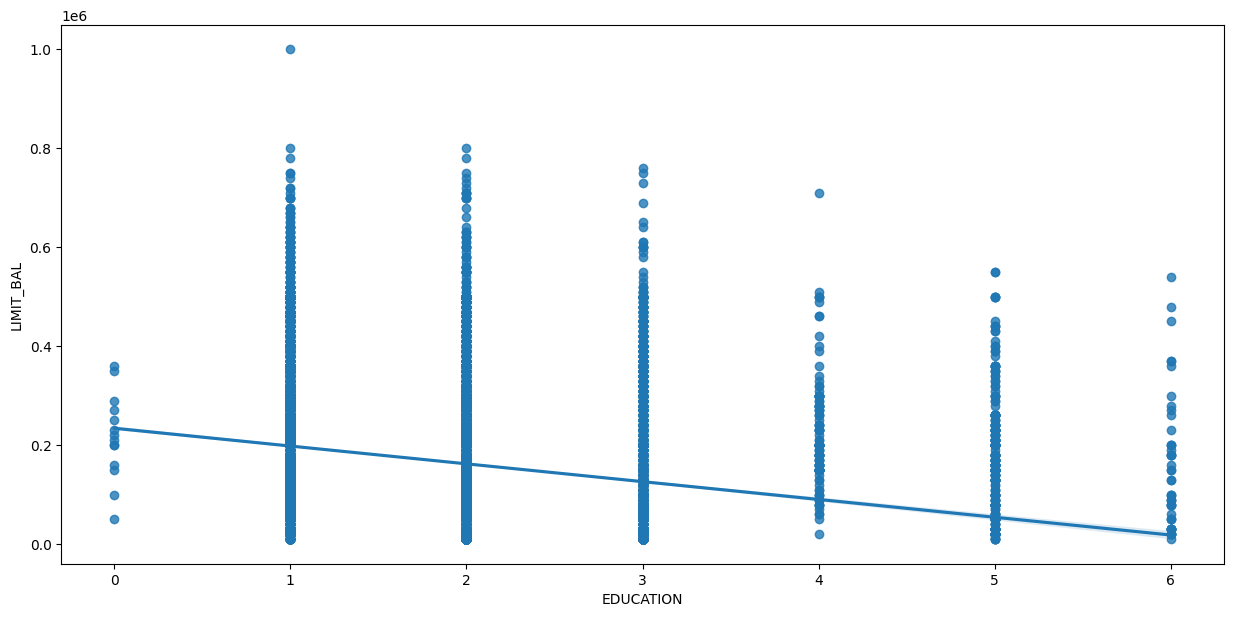

In [118]:
sns.regplot(x='EDUCATION', y='LIMIT_BAL', data=df)

<AxesSubplot: xlabel='PAY_AMT1', ylabel='BILL_AMT1'>

<AxesSubplot: xlabel='PAY_AMT2', ylabel='BILL_AMT2'>

<AxesSubplot: xlabel='PAY_AMT3', ylabel='BILL_AMT3'>

<AxesSubplot: xlabel='PAY_AMT4', ylabel='BILL_AMT4'>

<AxesSubplot: xlabel='PAY_AMT5', ylabel='BILL_AMT5'>

<AxesSubplot: xlabel='PAY_AMT6', ylabel='BILL_AMT6'>

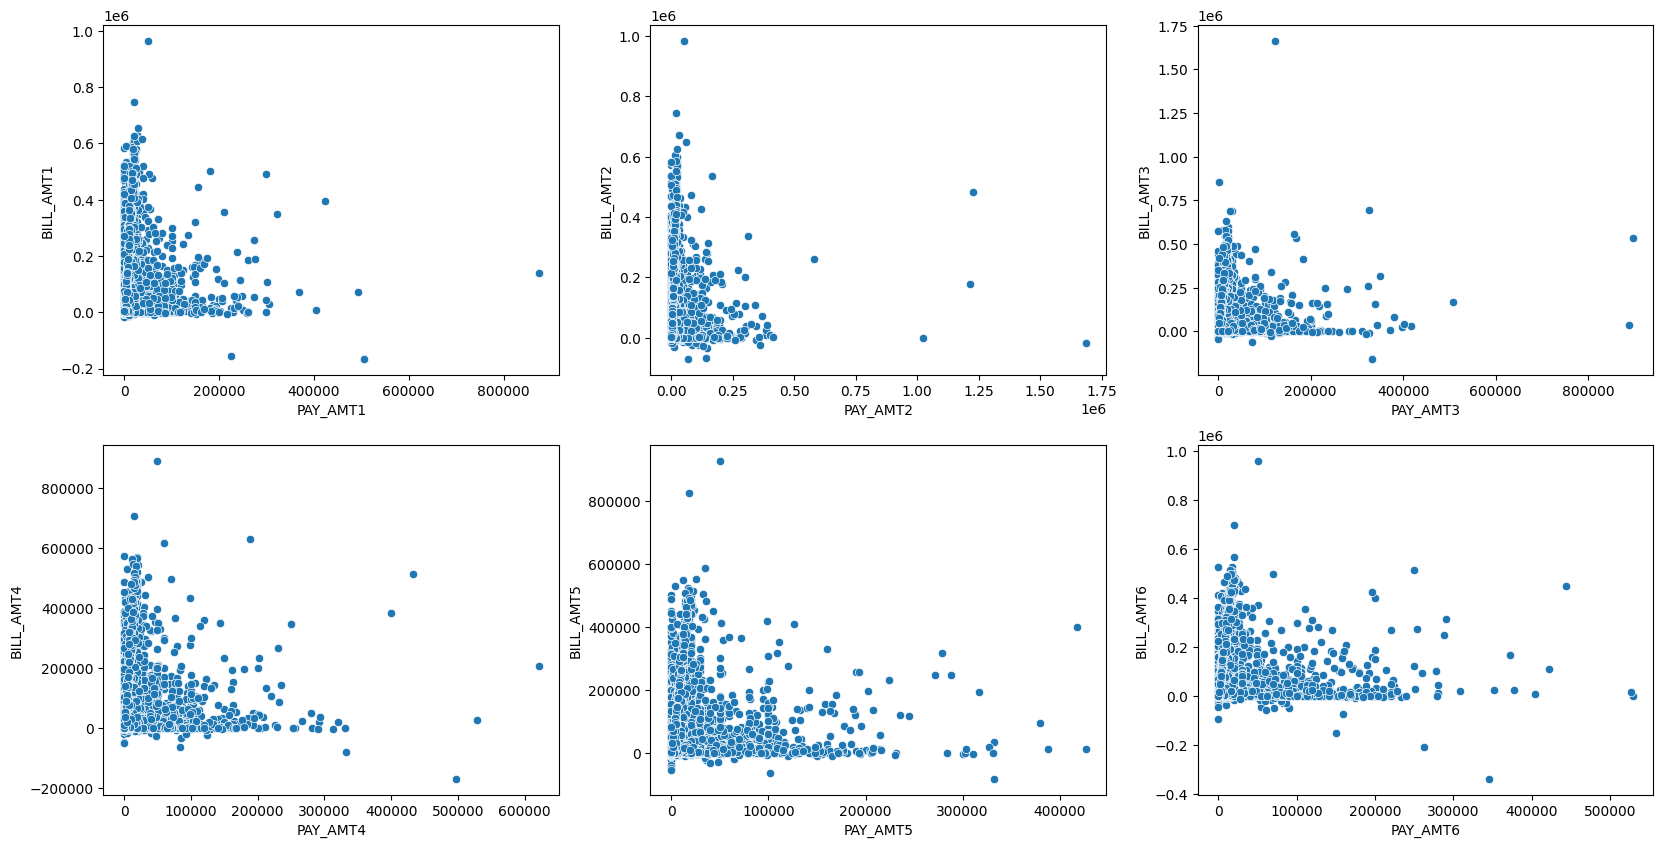

In [119]:
# plotting all bill amounts against pay amounts using scatter plots
fig, ax =plt.subplots(2,3, figsize=(20, 10))
sns.scatterplot(x=df['PAY_AMT1'], y=df['BILL_AMT1'], ax=ax[0,0])
sns.scatterplot(x=df['PAY_AMT2'], y=df['BILL_AMT2'], ax=ax[0,1])
sns.scatterplot(x=df['PAY_AMT3'], y=df['BILL_AMT3'], ax=ax[0,2])
sns.scatterplot(x=df['PAY_AMT4'], y=df['BILL_AMT4'], ax=ax[1,0])
sns.scatterplot(x=df['PAY_AMT5'], y=df['BILL_AMT5'], ax=ax[1,1])
sns.scatterplot(x=df['PAY_AMT6'], y=df['BILL_AMT6'], ax=ax[1,2])

[Text(0.5, 1.0, 'Count against limit balance showing the default result')]

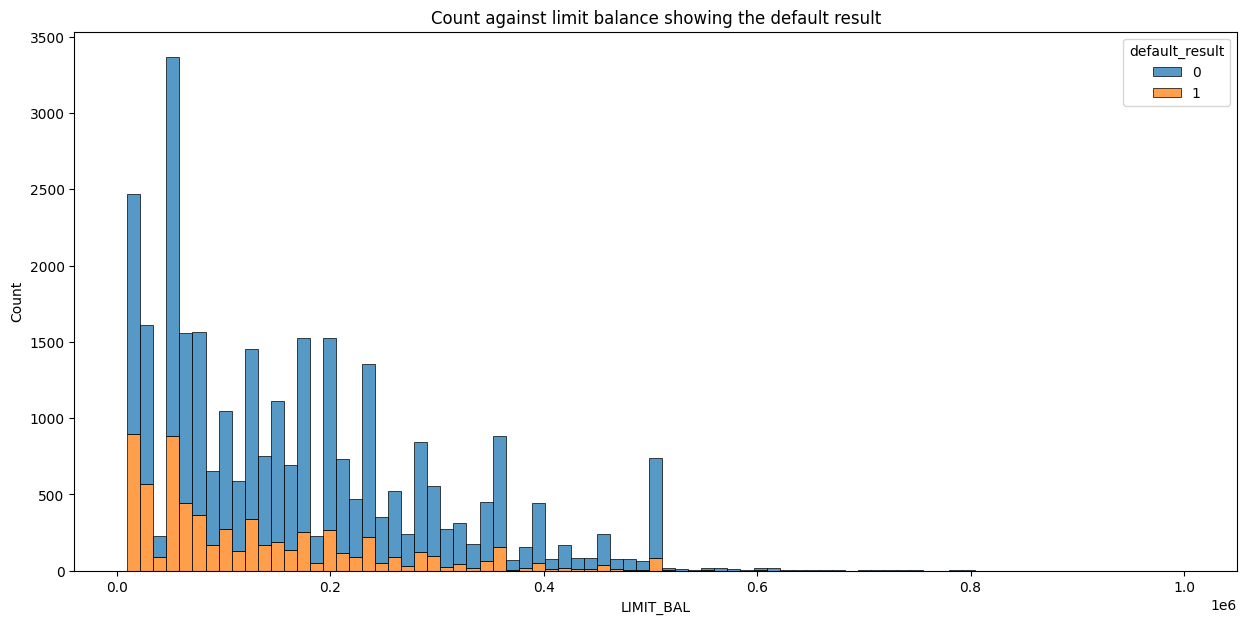

In [120]:
sns.histplot(df,x="LIMIT_BAL", hue="default_result", multiple="stack", linewidth=.5).set(title='Count against limit balance showing the default result')

<AxesSubplot: xlabel='PAY_1'>

<AxesSubplot: xlabel='PAY_2'>

<AxesSubplot: xlabel='PAY_3'>

<AxesSubplot: xlabel='PAY_4'>

<AxesSubplot: xlabel='PAY_5'>

<AxesSubplot: xlabel='PAY_6'>

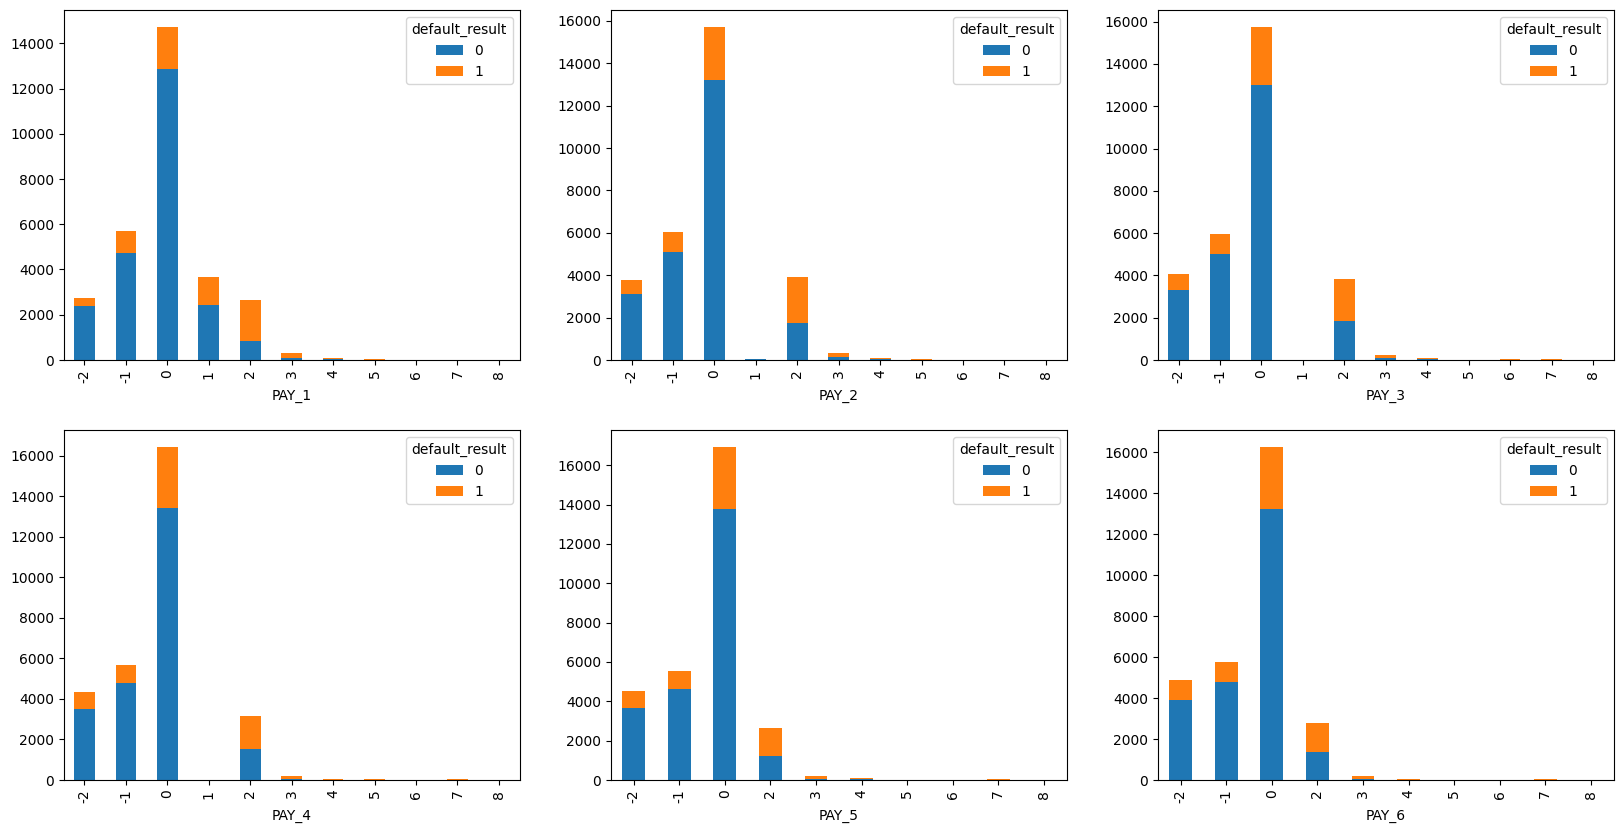

In [121]:
fig, ax =plt.subplots(2,3, figsize=(20, 10))
pay_x_plot = df.groupby(['PAY_1', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[0,0])
pay_x_plot = df.groupby(['PAY_2', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[0,1])
pay_x_plot = df.groupby(['PAY_3', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[0,2])
pay_x_plot = df.groupby(['PAY_4', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[1,0])
pay_x_plot = df.groupby(['PAY_5', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[1,1])
pay_x_plot = df.groupby(['PAY_6', 'default_result']).size().unstack()
pay_x_plot.plot(kind='bar', stacked=True, ax=ax[1,2])

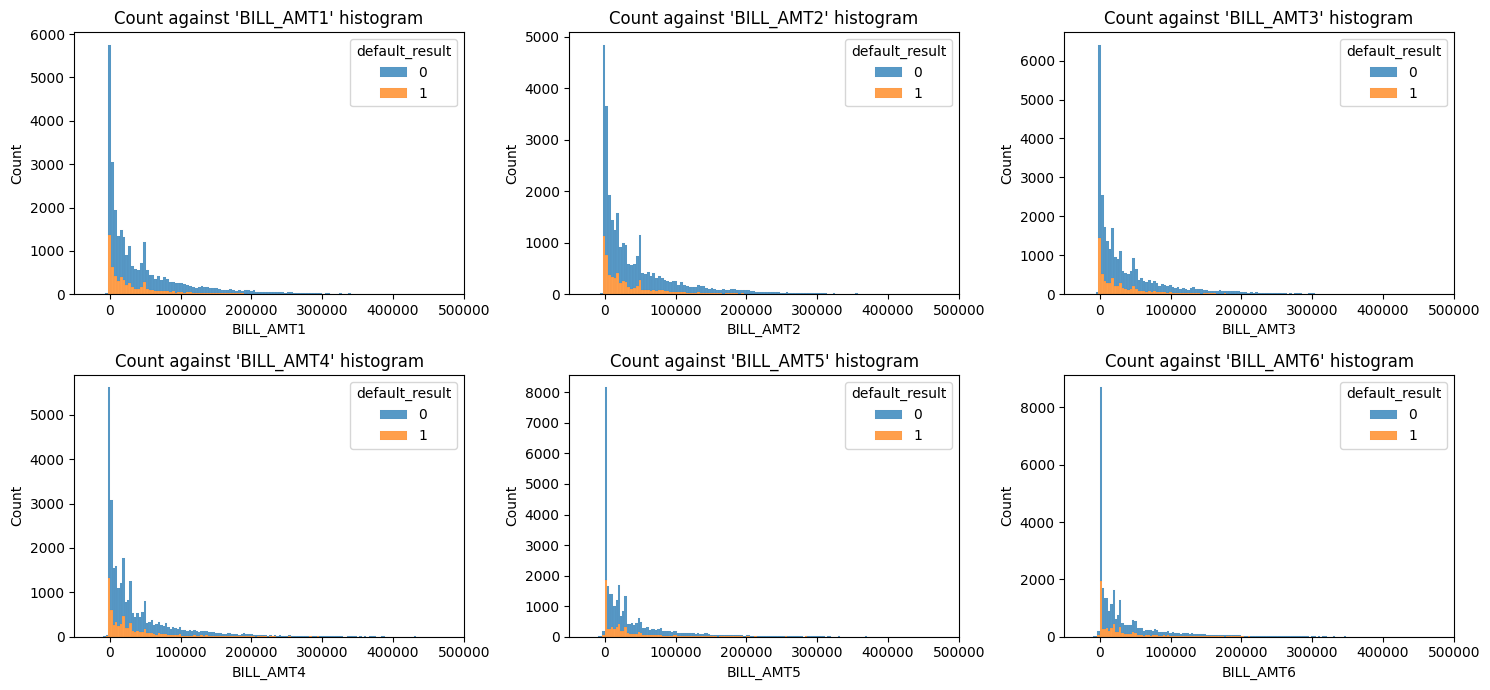

In [122]:
# histograms for BILL_AMTX against count

histogram_df = df

def histogram_plot(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        ax.set_xlim(-50000,500000)
        title_ = "Count against \'" + var_name + "\' histogram"
        sns.histplot(histogram_df,x=var_name, hue="default_result", multiple="stack", ax=ax, linewidth=.01).set(title=title_)
        fig.tight_layout() 


bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
histogram_plot(bills, bills.columns, 2, 3)

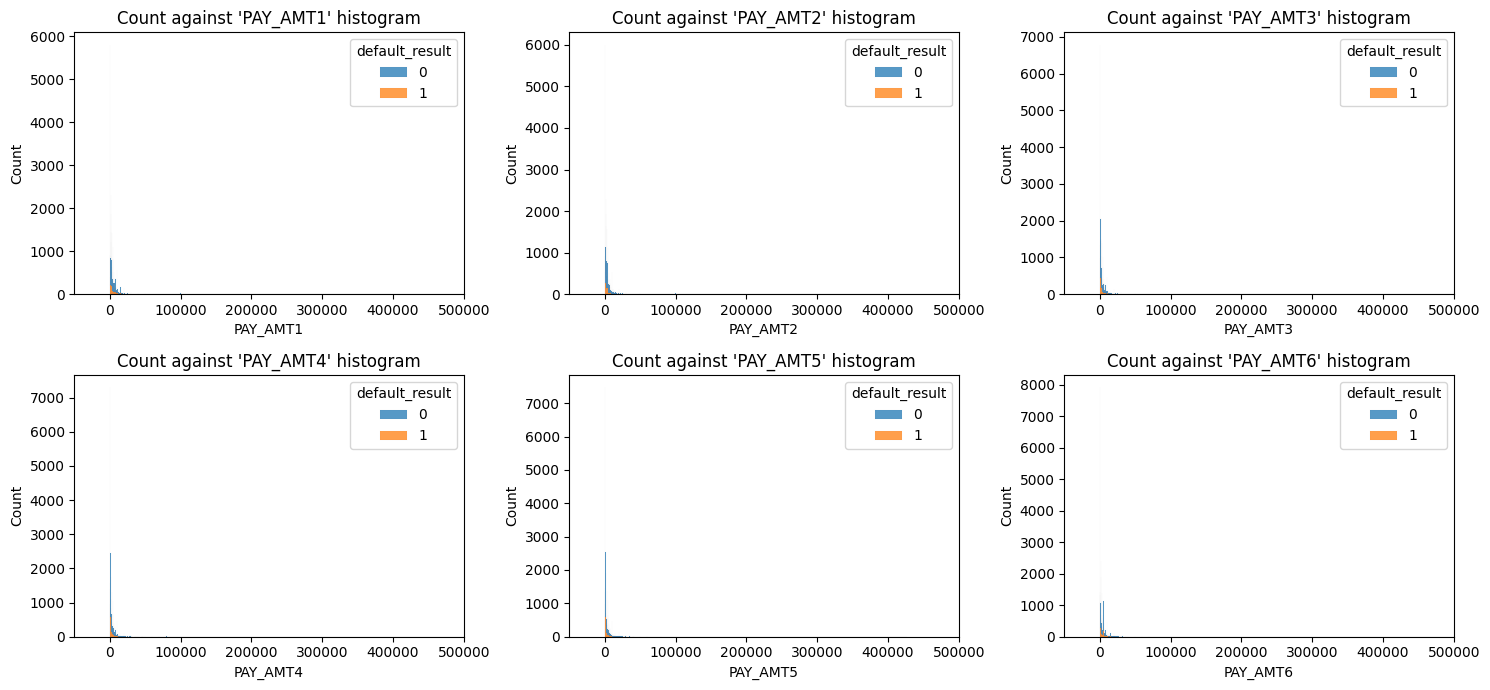

In [123]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
histogram_plot(pay, pay.columns, 2, 3)

# Correlation

In [16]:
df_corr = df.drop( df.iloc[:, 5:27], axis=1)

<AxesSubplot: >

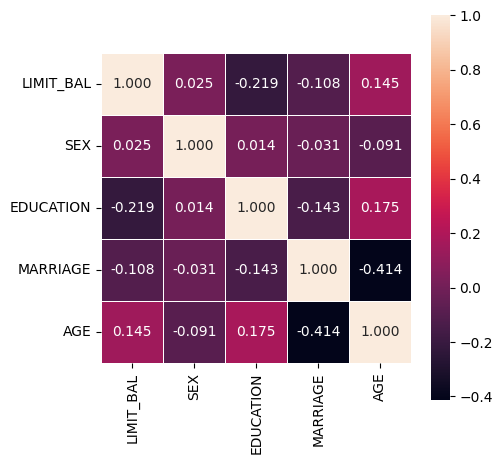

In [20]:
#correlation, shows how features are related to each other
df_corr = df.drop( df.iloc[:, 5:27], axis=1)
correlation_data = df_corr.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(correlation_data, annot=True, fmt='.3f', square=True, linewidth=.5)

The correlation matrix makes it evidently visible that whether the bill is payed on time (PAY_0, PAY_1 etc.), is not correlated highly to the categorical variables including the limit balance, sex, education or marriage or the numerical variable of age. The highest positive correlation between payments is other payments within the payments history. It is also evident that the default result is positively ocrrelated to whether the bill is payed on time. Therefore, it can be deduced that whether or not there is a default, is rather determined by whether the previous payment was done on time moreso than the characteristics of the individual. 

Categorical values show to be the categories: SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6. Therefore these categories need to be inspected. 

Debate on whether PAY_0.... etc. can be considered a categorical variable, in essence categorical but do we want to treat it as categorical, all depends on how model will handle it.

# Feature Engineering

As observed earlier, the categories 'EDUCATION' and 'MARRIAGE' have more categories than provided in the description, therefore, some of these categories can be merged.  
The 'EDUCATION' variable has additional categories of 0, 5 and 6. This can be dealt with by merging these categories with category 4 due to the fact that there aren't many instances in these three unnamed categories therefore they won't affect the dataset that much.   
The 'MARRIAGE' variable has an extra category for 0. This unnamed category can be merged with category 3 and treated as 'others', once again, this extra category does not have many instances therefore, this will not impact the results and models negatively.    
The 'PAY_X' variables have additional categories -2 and 0 however PAY_5 also has a missing variable 9 which was initially defined in the dataset description. This can be dealt with by merging the 0 category with the -1 and assuming that the 0 category means that the payments have been payed duly. 


In [21]:
df_fixed = df

# making the category 0, 5 and 6 part of category 4 for 'EDUCATION' variable
df_fixed['EDUCATION'] = df_fixed['EDUCATION'].apply(lambda x:4 if x==0 or x==5 or x==6 else x)
# making the category 0 part of category 3 for 'MARRIAGE' variable
df_fixed['MARRIAGE'] = df_fixed['MARRIAGE'].apply(lambda x:3 if x==0 else x)


# checking NEW unique categories of'EDUCATION' variable
education_unique = df_fixed['EDUCATION'].unique()
print("New unique 'EDUCATION' categories:", sorted(education_unique))
# checking NEW unique categories of 'MARRIAGE' variable
marriage_unique = df_fixed['MARRIAGE'].unique()
print("New unique 'MARRIAGE' categories:", sorted(marriage_unique))


New unique 'EDUCATION' categories: [1, 2, 3, 4]
New unique 'MARRIAGE' categories: [1, 2, 3]


Creation of dummy variables - one-hot encoding.

In [22]:
df_ = df_fixed
df_

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [23]:
# performing one hot encoding of dummy variables for 'MARRIAGE', can do this due to the fact that this variable is categorical and not ranked
MARRIAGE_dummies = pd.get_dummies(df_['MARRIAGE'], columns='MARRIAGE', prefix='MARRIAGE')
MARRIAGE_dummies

,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
5,1,0,0
...,...,...,...
29996,1,0,0
29997,0,1,0
29998,0,1,0


In [24]:
# REFERENCE github code?
# adding 'MARRIAGE' dummy variables to dataset by replacing origincal 'MARRIAGE' variable
df_add_m_dummies = pd.concat([df_.iloc[:,0:3],MARRIAGE_dummies],axis = 1)
df_dummies = pd.concat([df_add_m_dummies,df_.iloc[:,4:24]],axis = 1)
df_new_m = df_dummies
df_new_m

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,0,0,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,0,1,0,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,0,1,0,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,0,0,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,0,0,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,0,0,39,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,0,1,0,43,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,0,1,0,37,4,3,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [25]:
SEX_dummies = pd.get_dummies(df_['SEX'], columns='SEX', prefix='SEX')
SEX_dummies

,SEX_1,SEX_2
ID,,
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
...,...,...
29996,1,0
29997,1,0
29998,1,0


In [26]:
# adding 'SEX' dummy variables to dataset by replacing origincal 'SEX' variable
df_add_s_dummies = pd.concat([df_new_m.iloc[:,0:1],SEX_dummies],axis = 1)
df_dummies = pd.concat([df_add_s_dummies,df_new_m.iloc[:,2:26]],axis = 1)
df_new_s = df_dummies
df_new_s

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,1,2,1,0,0,24,2,2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,1,2,0,1,0,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,1,2,0,1,0,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,1,2,1,0,0,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,0,2,1,0,0,57,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,0,3,1,0,0,39,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,0,3,0,1,0,43,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,0,2,0,1,0,37,4,3,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [27]:
# renaming final dataset for simplicity
df_new = df_new_s
df_new 

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,1,2,1,0,0,24,2,2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,1,2,0,1,0,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,1,2,0,1,0,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,1,2,1,0,0,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,0,2,1,0,0,57,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,0,3,1,0,0,39,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,0,3,0,1,0,43,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,0,2,0,1,0,37,4,3,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


The 'EDUCATION' variable does not require dummy variables to be generated due to the fact that it is a variabled that is ordered (ordinal data), this is becuase university takes place after high school as does graduate school after univeristy and it is not desired for the model not to be able to make that distinction as it can predict the reliability of the model.

# Data Cleaning

Having inspected the CSV file of the dataset with the naked eye, it became clearly apparent that there were several rows that had completely null values for columns 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5' and 'PAY_AM61'. It is not valid for a null value to be present for all of these variables, therefore it is best to remove them to obtain models with higher accuracy.

In [28]:
# checking if there are any rows that are entirely null
# some rows are 0 from BILL_AMT1 to PAY_AMT6 - for those, get rid of the full row as they will not help with training the data
df_new = df_new[(df.BILL_AMT1 != 0) | (df.BILL_AMT2 != 0) | (df.BILL_AMT3 != 0) | (df.BILL_AMT4 != 0) | (df.BILL_AMT5 != 0) | (df.BILL_AMT6 != 0) | (df.PAY_AMT1 != 0) | (df.PAY_AMT2 != 0) | (df.PAY_AMT3 != 0) | (df.PAY_AMT4 != 0) | (df.PAY_AMT5 != 0) | (df.PAY_AMT6 != 0)]
df_new


,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,1,2,1,0,0,24,2,2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,1,2,0,1,0,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,1,2,0,1,0,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,1,2,1,0,0,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,0,2,1,0,0,57,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,0,3,1,0,0,39,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,0,3,0,1,0,43,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,0,2,0,1,0,37,4,3,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


# Data exploration post data transformation

<AxesSubplot: xlabel='default_result', ylabel='LIMIT_BAL'>

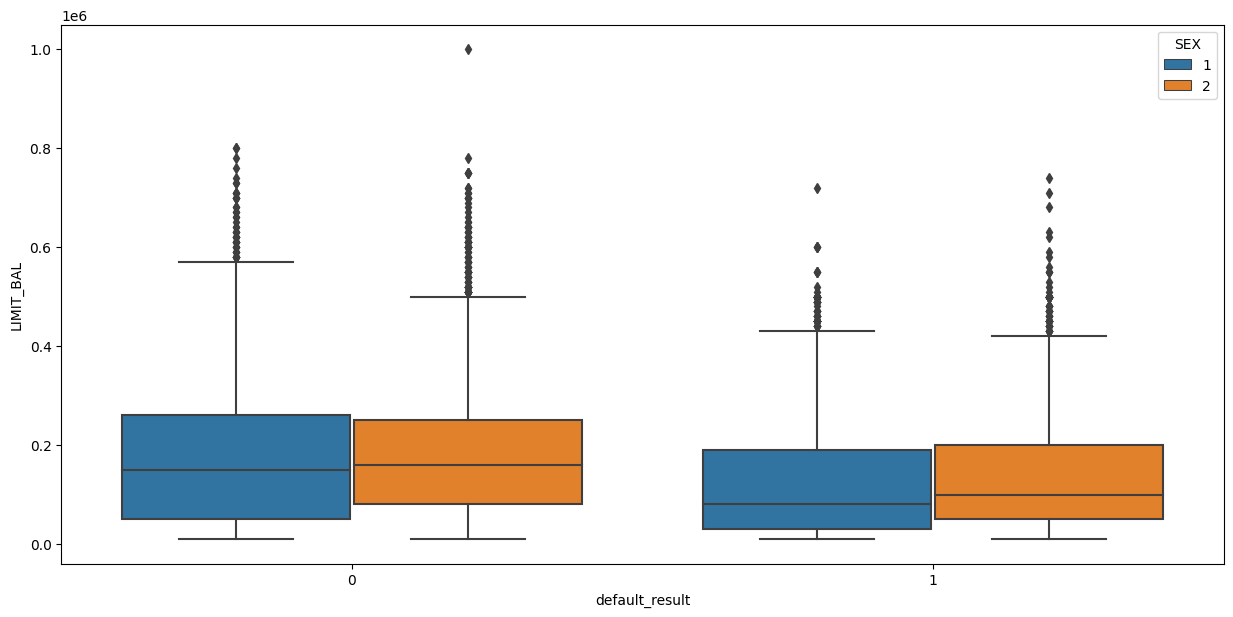

In [134]:
sns.boxplot(x='default_result',hue='SEX', y='LIMIT_BAL',data=df_fixed)

<AxesSubplot: xlabel='default_result', ylabel='LIMIT_BAL'>

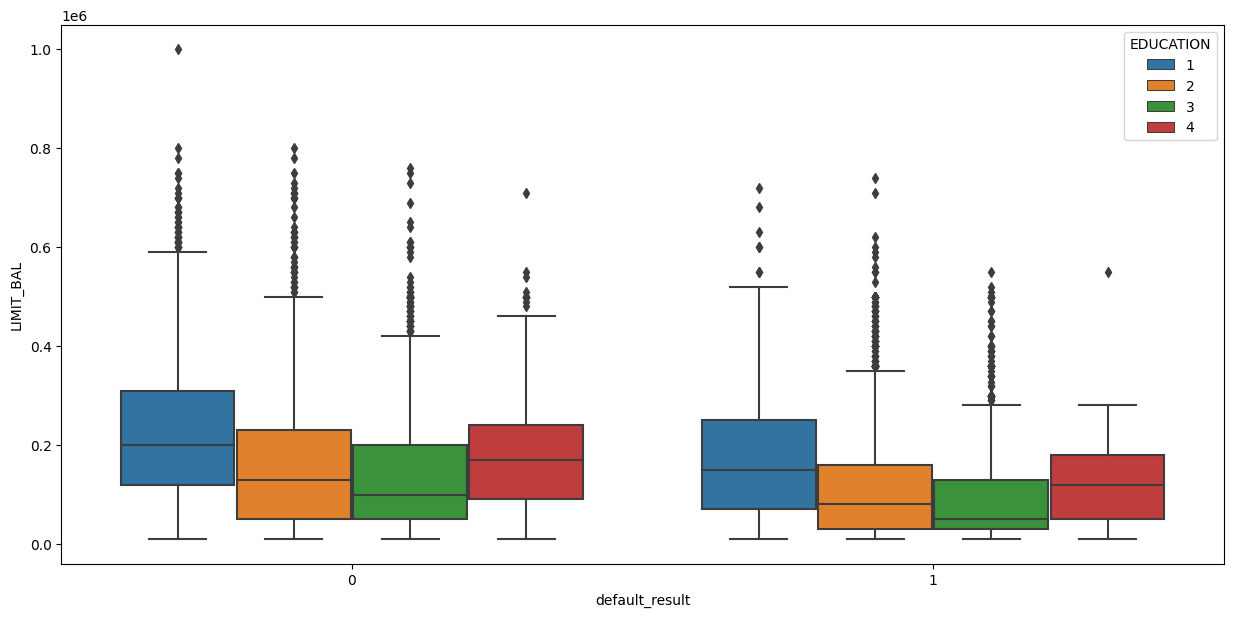

In [135]:
sns.boxplot(x='default_result',hue='EDUCATION', y='LIMIT_BAL',data=df_fixed)

<AxesSubplot: xlabel='default_result', ylabel='LIMIT_BAL'>

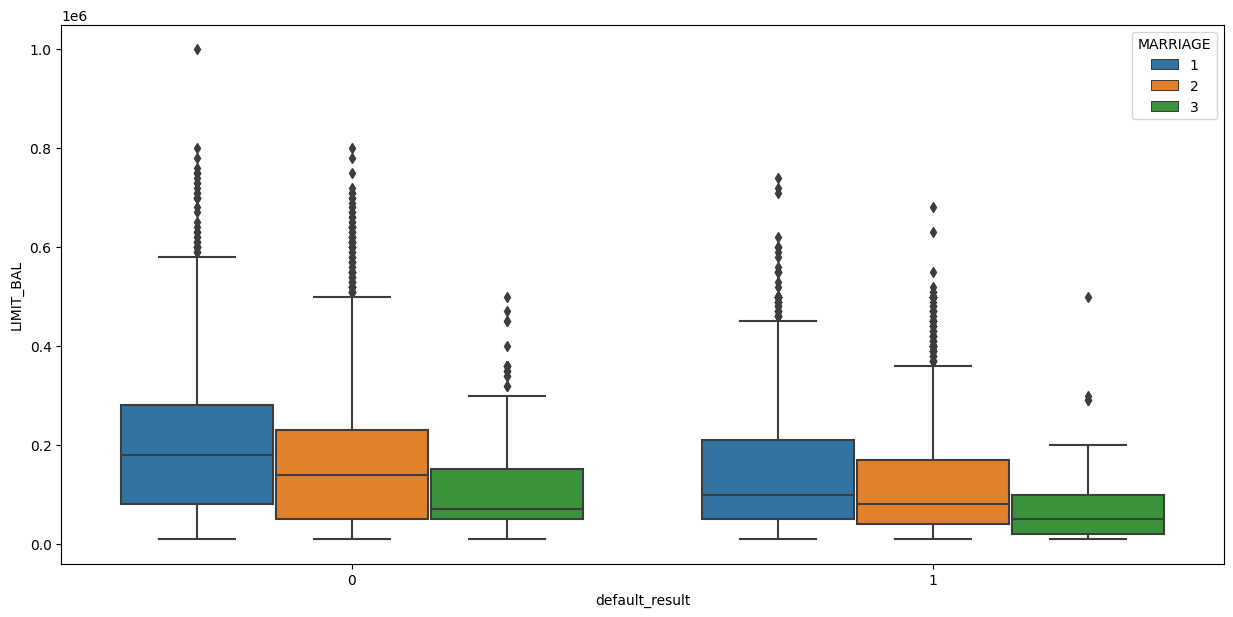

In [136]:
sns.boxplot(x='default_result',hue='MARRIAGE', y='LIMIT_BAL',data=df_fixed)

<AxesSubplot: xlabel='AGE', ylabel='LIMIT_BAL'>

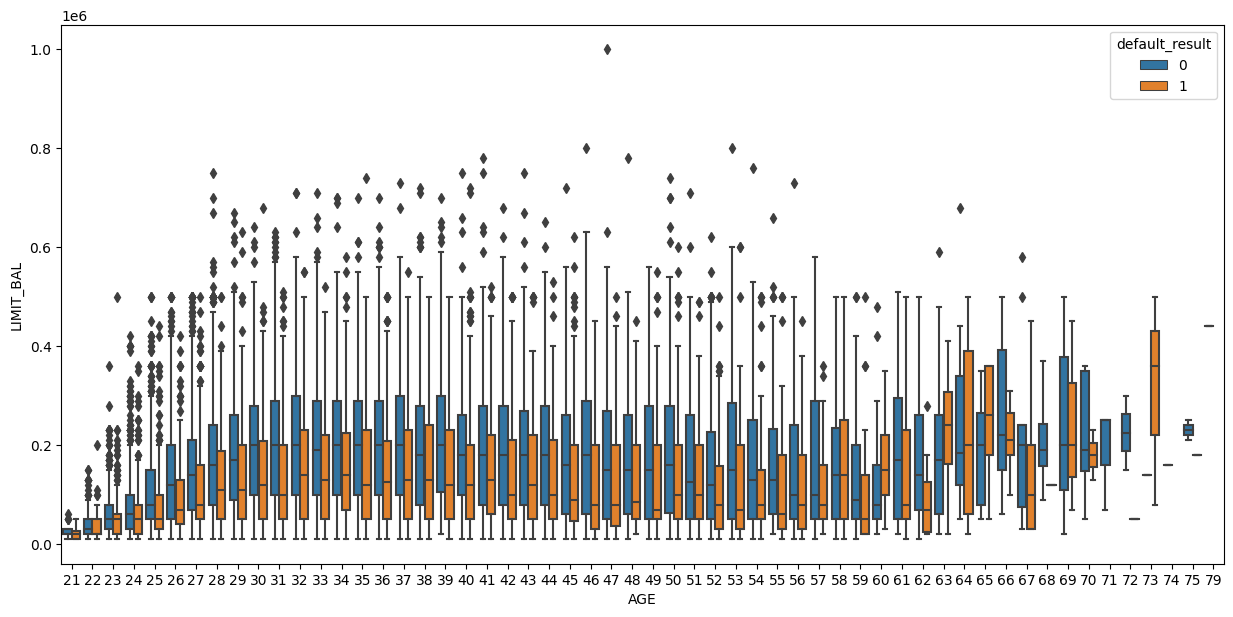

In [137]:
sns.boxplot(x='AGE',hue='default_result', y='LIMIT_BAL',data=df_fixed)

<AxesSubplot: xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

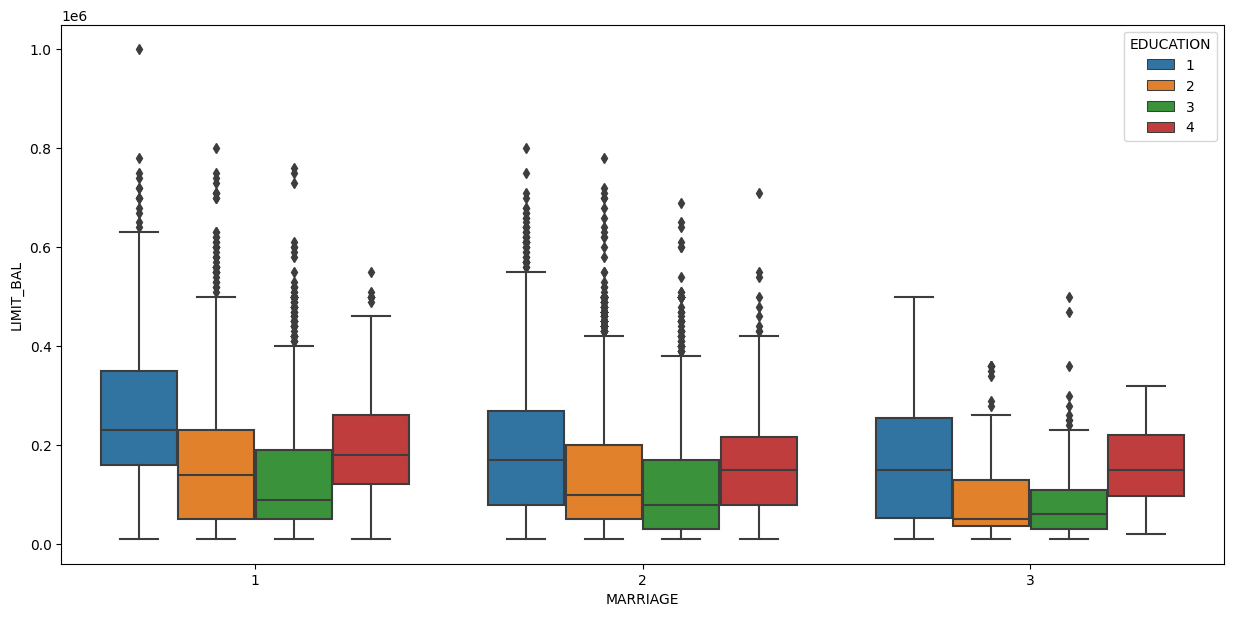

In [138]:
sns.boxplot(x='MARRIAGE',hue='EDUCATION', y='LIMIT_BAL',data=df_fixed)

Having plotted the boxplots, it is apparent that the data contains outliers

# Outliers

In [139]:
# defining numerical features of the dataset
numerical_features = ['LIMIT_BAL', 'AGE'] + list(df_new.columns[14:26])

# obtaining the outliers of the dataset
def outlier_calc(data, feature):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    lower_bound = data[feature].quantile(0.25) - 1.5 * IQR
    upper_bound = data[feature].quantile(0.75) + 1.5 * IQR
    outliers = data.index[ (data[feature] < lower_bound) | (data[feature] > upper_bound) ]
    return outliers

list_of_outliers = []
for ft in numerical_features:
    list_of_outliers.extend(outlier_calc(df_new, ft))

def removeoutliers(data, outliers):
    outliers = sorted(set(outliers))
    data = data.drop(outliers)
    return data

df_cleaned = removeoutliers(df_new, list_of_outliers)
df_cleaned

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_result
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,1,2,1,0,0,24,2,2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,1,2,0,1,0,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,1,2,0,1,0,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,1,2,1,0,0,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,0,1,0,1,0,37,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,210000,1,0,2,1,0,0,34,3,2,...,2500,2500,2500,0,0,0,0,0,0,1
29993,10000,1,0,3,1,0,0,43,0,0,...,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,0,2,0,1,0,34,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1


In [140]:
df_new = df_cleaned

# Adjustment of dataset for regression problem

In [70]:
# only required to have X0, X2-5 from the data, therefore dropping all data after 'AGE' column
df_new = df_new.drop( df_new.iloc[:, 8:27], axis=1)
df_new

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE
ID,,,,,,,,
1,20000,0,1,2,1,0,0,24
2,120000,0,1,2,0,1,0,26
3,90000,0,1,2,0,1,0,34
4,50000,0,1,2,1,0,0,37
5,50000,1,0,2,1,0,0,57
...,...,...,...,...,...,...,...,...
29996,220000,1,0,3,1,0,0,39
29997,150000,1,0,3,0,1,0,43
29998,30000,1,0,2,0,1,0,37


# Saving as new csv

In [71]:
df_new.to_csv('df_')

In [75]:
df_new = pd.read_csv('df_')
df_new

,ID,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE
0,1,20000,0,1,2,1,0,0,24
1,2,120000,0,1,2,0,1,0,26
2,3,90000,0,1,2,0,1,0,34
3,4,50000,0,1,2,1,0,0,37
4,5,50000,1,0,2,1,0,0,57
...,...,...,...,...,...,...,...,...,...
29200,29996,220000,1,0,3,1,0,0,39
29201,29997,150000,1,0,3,0,1,0,43
29202,29998,30000,1,0,2,0,1,0,37
29203,29999,80000,1,0,3,1,0,0,41


# Preparation for model training - creating X and y

In [78]:
# defining X and y variables 

X = df_new.iloc[:,1:8] # feature values
y = df_new['LIMIT_BAL'] # predicted values

# Transformations

Having inspected the dataset, it is apparent that there is a signifcant amount of variables with the value of 0. For example, a log transformation to normalise the data is not possible, nor is square root transformation. These transformations are mostly applied to normalise skewed data, however applying these transformations to the data at hand, would not be beneficial.

# Scaling of data

In [79]:
# importing necessary libraries to perform splitting of dataset into train and test portion
# train data will be used to train the model
# test data will be used to evaluate how well the trained model generalises on unseen data
from sklearn.model_selection import train_test_split
# apply scaling in order to scale each feature to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,LIMIT_BAL,SEX_1,SEX_2,EDUCATION,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.010101,0.0,1.0,0.333333,1.0,0.0,0.0
1,0.111111,0.0,1.0,0.333333,0.0,1.0,0.0
2,0.080808,0.0,1.0,0.333333,0.0,1.0,0.0
3,0.040404,0.0,1.0,0.333333,1.0,0.0,0.0
4,0.040404,1.0,0.0,0.333333,1.0,0.0,0.0
...,...,...,...,...,...,...,...
29200,0.212121,1.0,0.0,0.666667,1.0,0.0,0.0
29201,0.141414,1.0,0.0,0.666667,0.0,1.0,0.0
29202,0.020202,1.0,0.0,0.333333,0.0,1.0,0.0
29203,0.070707,1.0,0.0,0.666667,1.0,0.0,0.0


# Training/testing split of dataset

In [80]:
# splitting the dataset so that 80% of the data is for training and 20% of the data is for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
y_true = y_test

In [81]:
X_train.to_numpy()
X_test.to_numpy()
y_train.to_numpy()
y_test.to_numpy()

array([150000,  70000, 200000, ..., 200000, 170000,  50000])

# Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [83]:
print('LINEAR REGRESSION:')
# linear regression model
lin_reg = LinearRegression()
# fitting the model
lin_reg.fit(X_train, y_train)
# intercept - value of predicted response when all independent variables (X) are 0, intercept is the bias - b0
print('Intercept:', lin_reg.intercept_)
# coefficients - shows how much each X grows when the predicted response increases by 1
print('Coefficients (slope):', lin_reg.coef_)
# y pred
y_pred_linreg = lin_reg.predict(X_train)
print('Predicted response:', y_pred_linreg)
# finding predicted output values using test data
y_pred_linregmodel = lin_reg.predict(X_test)
print('Predicted response using test data:', y_pred_linregmodel)
# R squared
r_sq_linreg = r2_score(y_true, y_pred_linregmodel)
print('Coefficient of determination (R squared):', r_sq_linreg)

LINEAR REGRESSION:
Intercept: 23313.6912143855
Coefficients (slope): [ 9.90000000e+05 -5.58290117e+03 -5.58290117e+03  2.57387001e-10
 -7.73079004e+03 -7.73079004e+03 -7.73079004e+03]
Predicted response: [ 50000. 200000. 190000. ... 120000. 200000. 470000.]
Predicted response using test data: [150000.  70000. 200000. ... 200000. 170000.  50000.]
Coefficient of determination (R squared): 1.0


# Linear Regression - Hyper parameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [92]:
print('Parameters in use:\n')
print(lin_reg.get_params())

Parameters in use:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [100]:
# hyperparameter grid for tuning

param_grid = { 
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs' : [10, 20, 30, 60],
    'positive' : [True, False],
}

# Logistic regression classifier: lin_reg

# GridSearchCV 
linreg_cv = GridSearchCV(lin_reg, param_grid, verbose=10, cv=5)

# Fit it to the data
linreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Linear Regression Parameters: {}".format(linreg_cv.best_params_)) 
print("Best score is {}".format(linreg_cv.best_score_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START copy_X=True, fit_intercept=True, n_jobs=10, positive=True..
[CV 1/5; 1/32] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True;, score=1.000 total time=   0.0s
[CV 2/5; 1/32] START copy_X=True, fit_intercept=True, n_jobs=10, positive=True..
[CV 2/5; 1/32] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True;, score=1.000 total time=   0.0s
[CV 3/5; 1/32] START copy_X=True, fit_intercept=True, n_jobs=10, positive=True..
[CV 3/5; 1/32] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True;, score=1.000 total time=   0.0s
[CV 4/5; 1/32] START copy_X=True, fit_intercept=True, n_jobs=10, positive=True..
[CV 4/5; 1/32] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True;, score=1.000 total time=   0.0s
[CV 5/5; 1/32] START copy_X=True, fit_intercept=True, n_jobs=10, positive=True..
[CV 5/5; 1/32] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True;, score=1.000 to

# Linear Regression - Tuned

In [96]:
print('LINEAR REGRESSION:')
# linear regression model
lin_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, positive=True)
# fitting the model
lin_reg.fit(X_train, y_train)
# intercept - value of predicted response when all independent variables (X) are 0, intercept is the bias - b0
print('Intercept:', lin_reg.intercept_)
# coefficients - shows how much each X grows when the predicted response increases by 1
print('Coefficients (slope):', lin_reg.coef_)
# y pred
y_pred_linreg = lin_reg.predict(X_train)
print('Predicted response:', y_pred_linreg)
# finding predicted output values using test data
y_pred_linregmodel = lin_reg.predict(X_test)
print('Predicted response using test data:', y_pred_linregmodel)
# R squared
r_sq_linreg = r2_score(y_true, y_pred_linregmodel)
print('Coefficient of determination (R squared):', r_sq_linreg)

LINEAR REGRESSION:
Intercept: 9999.999999998341
Coefficients (slope): [9.90000000e+05 0.00000000e+00 2.20984490e-11 4.26477344e-11
 1.08451586e-11 0.00000000e+00 1.09204445e-11]
Predicted response: [ 50000. 200000. 190000. ... 120000. 200000. 470000.]
Predicted response using test data: [150000.  70000. 200000. ... 200000. 170000.  50000.]
Coefficient of determination (R squared): 1.0


In [104]:
import mlxtend
from mlxtend.evaluate import bias_variance_decomp

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
y_true = y_test

In [109]:
X_train = X_train.values
y_train = y_train.values
X_test_ = X_test.values
y_test_ = y_test.values
mse, bias, variance = bias_variance_decomp(lin_reg, X_train, y_train, X_test_, y_test_, loss='mse', num_rounds=10, random_seed=33)
# summarize results
print('MSE:' , mse)
print('Bias:' , bias)
print('Variance:' , variance)

MSE: 1.111663213571022e-16
Bias: 1.520524042893551e-17
Variance: 9.596457228869738e-17


# Random Forest

In [ ]:
X_train.to_numpy()
X_test.to_numpy()
y_train.to_numpy()
y_test.to_numpy()

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
print('RANDOM FOREST REGRESSOR:')
# random forest regressor model
rf_reg = RandomForestRegressor()
# fitting the model
rf_reg.fit(X_train, y_train)
# y pred
y_pred_rfreg = lin_reg.predict(X_train)
print('Predicted response:', y_pred_rfreg)
# predicted output values using test data
y_pred_rfregmodel = rf_reg.predict(X_test)
print('Predicted response using test data:', y_pred_rfregmodel)
# R squared
r_sq_rfreg = r2_score(y_test, y_pred_rfregmodel)
print('Coefficient of determination (R squared):', r_sq_rfreg)

RANDOM FOREST REGRESSOR:
Predicted response: [ 50000. 200000. 190000. ... 120000. 200000. 470000.]
Predicted response using test data: [150000.  70000. 200000. ... 200000. 170000.  50000.]
Coefficient of determination (R squared): 0.9995634799807845


# Random Forest - Hyper parameter Tuning

In [87]:
# splitting the dataset so that 80% of the data is for training and 20% of the data is for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [99]:
# https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv
param_grid = { 
    'n_estimators': [10, 20],
    'max_features': ['auto', 'sqrt'],
    'max_leaf_nodes' : range(2,10,1),
    'max_depth' : [2,4],
}

randomforest_cv = GridSearchCV(estimator=rf_reg, param_grid=param_grid, verbose=10, cv= 5)
randomforest_cv.fit(X_train, y_train)

print("Tuned Random Forest Parameters: {}".format(randomforest_cv.best_params_)) 
print("Best score is {}".format(randomforest_cv.best_score_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5; 1/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 1/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.692 total time=   0.1s
[CV 2/5; 1/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 1/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.687 total time=   0.1s
[CV 3/5; 1/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 3/5; 1/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.693 total time=   0.1s
[CV 4/5; 1/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 1/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.686 total time=   0.1s
[CV 5/5; 1/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10
[CV 5/5; 1/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.690 total time=   0.1s
[CV 1/5; 2/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 1/5; 2/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.696 total time=   0.1s
[CV 2/5; 2/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20
[CV 2/5; 2/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.687 total time=   0.1s
[CV 3/5; 2/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 2/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.693 total time=   0.1s
[CV 4/5; 2/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20
[CV 4/5; 2/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.686 total time=   0.1s
[CV 5/5; 2/64] START max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 5/5; 2/64] END max_depth=2, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.690 total time=   0.1s
[CV 1/5; 3/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 1/5; 3/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.814 total time=   0.1s
[CV 2/5; 3/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 2/5; 3/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.809 total time=   0.1s
[CV 3/5; 3/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 3/5; 3/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.809 total time=   0.1s
[CV 4/5; 3/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 4/5; 3/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.811 total time=   0.1s
[CV 5/5; 3/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 5/5; 3/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.807 total time=   0.1s
[CV 1/5; 4/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20
[CV 1/5; 4/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.816 total time=   0.1s
[CV 2/5; 4/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 4/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.809 total time=   0.1s
[CV 3/5; 4/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20
[CV 3/5; 4/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.809 total time=   0.1s
[CV 4/5; 4/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 4/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.812 total time=   0.1s
[CV 5/5; 4/64] START max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20
[CV 5/5; 4/64] END max_depth=2, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.819 total time=   0.1s
[CV 1/5; 5/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 1/5; 5/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.919 total time=   0.1s
[CV 2/5; 5/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 2/5; 5/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.918 total time=   0.0s
[CV 3/5; 5/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 3/5; 5/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.922 total time=   0.1s
[CV 4/5; 5/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 4/5; 5/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.920 total time=   0.0s
[CV 5/5; 5/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 5/5; 5/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.919 total time=   0.1s
[CV 1/5; 6/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 1/5; 6/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.919 total time=   0.1s
[CV 2/5; 6/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20
[CV 2/5; 6/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.918 total time=   0.1s
[CV 3/5; 6/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20
[CV 3/5; 6/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.924 total time=   0.1s
[CV 4/5; 6/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 6/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.920 total time=   0.1s
[CV 5/5; 6/64] START max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20
[CV 5/5; 6/64] END max_depth=2, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.919 total time=   0.1s
[CV 1/5; 7/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 1/5; 7/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.919 total time=   0.1s
[CV 2/5; 7/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 2/5; 7/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.918 total time=   0.1s
[CV 3/5; 7/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 3/5; 7/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.921 total time=   0.1s
[CV 4/5; 7/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 4/5; 7/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.920 total time=   0.1s
[CV 5/5; 7/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 5/5; 7/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.919 total time=   0.1s
[CV 1/5; 8/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20
[CV 1/5; 8/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.919 total time=   0.1s
[CV 2/5; 8/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20
[CV 2/5; 8/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.918 total time=   0.1s
[CV 3/5; 8/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 3/5; 8/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.921 total time=   0.1s
[CV 4/5; 8/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20
[CV 4/5; 8/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.920 total time=   0.1s
[CV 5/5; 8/64] START max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 8/64] END max_depth=2, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.919 total time=   0.1s
[CV 1/5; 9/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 1/5; 9/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.919 total time=   0.1s
[CV 2/5; 9/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 2/5; 9/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.918 total time=   0.1s
[CV 3/5; 9/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 3/5; 9/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.921 total time=   0.1s
[CV 4/5; 9/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 4/5; 9/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.920 total time=   0.1s
[CV 5/5; 9/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 5/5; 9/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.919 total time=   0.1s
[CV 1/5; 10/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20
[CV 1/5; 10/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.919 total time=   0.1s
[CV 2/5; 10/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 2/5; 10/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.918 total time=   0.1s
[CV 3/5; 10/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20
[CV 3/5; 10/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.924 total time=   0.1s
[CV 4/5; 10/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 10/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.920 total time=   0.1s
[CV 5/5; 10/64] START max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20
[CV 5/5; 10/64] END max_depth=2, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.919 total time=   0.1s
[CV 1/5; 11/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 1/5; 11/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.925 total time=   0.1s
[CV 2/5; 11/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 2/5; 11/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.918 total time=   0.1s
[CV 3/5; 11/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 3/5; 11/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.921 total time=   0.1s
[CV 4/5; 11/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 4/5; 11/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.920 total time=   0.1s
[CV 5/5; 11/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 5/5; 11/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.919 total time=   0.1s
[CV 1/5; 12/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 1/5; 12/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.919 total time=   0.1s
[CV 2/5; 12/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20
[CV 2/5; 12/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.918 total time=   0.1s
[CV 3/5; 12/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 12/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.921 total time=   0.1s
[CV 4/5; 12/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20
[CV 4/5; 12/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.920 total time=   0.1s
[CV 5/5; 12/64] START max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 12/64] END max_depth=2, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.919 total time=   0.1s
[CV 1/5; 13/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 1/5; 13/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.919 total time=   0.1s
[CV 2/5; 13/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 2/5; 13/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.918 total time=   0.1s
[CV 3/5; 13/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 3/5; 13/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.921 total time=   0.1s
[CV 4/5; 13/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 4/5; 13/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.920 total time=   0.1s
[CV 5/5; 13/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 5/5; 13/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.919 total time=   0.1s
[CV 1/5; 14/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 1/5; 14/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.919 total time=   0.1s
[CV 2/5; 14/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 14/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.918 total time=   0.2s
[CV 3/5; 14/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 14/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.921 total time=   0.4s
[CV 4/5; 14/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20
[CV 4/5; 14/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.920 total time=   0.2s
[CV 5/5; 14/64] START max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 14/64] END max_depth=2, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.919 total time=   0.1s
[CV 1/5; 15/64] START max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 1/5; 15/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.919 total time=   0.0s
[CV 2/5; 15/64] START max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 2/5; 15/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.918 total time=   0.0s
[CV 3/5; 15/64] START max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 3/5; 15/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.921 total time=   0.0s
[CV 4/5; 15/64] START max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 4/5; 15/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.920 total time=   0.0s
[CV 5/5; 15/64] START max_depth=2, max_features=auto,

/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 5/5; 15/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.919 total time=   0.1s
[CV 1/5; 16/64] START max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20
[CV 1/5; 16/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.919 total time=   0.1s
[CV 2/5; 16/64] START max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 16/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.918 total time=   0.1s
[CV 3/5; 16/64] START max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20
[CV 3/5; 16/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.921 total time=   0.1s
[CV 4/5; 16/64] START max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 16/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.921 total time=   0.2s
[CV 5/5; 16/64] START max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20
[CV 5/5; 16/64] END max_depth=2, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.919 total time=   0.2s
[CV 1/5; 17/64] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 17/64] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.454 total time=   0.0s
[CV 2/5; 17/64] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 17/64] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.381 total time=   0.0s
[CV 3/5; 17/64] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 17/64] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.370 total time=   0.0s
[CV 4/5; 17/64] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 17/64] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.252 total time=   0.0s
[CV 5/5; 17/64] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 5/5; 17/64] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.289 total time=   0.0s
[CV 1/5; 18/64] START max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=20
[CV 1/5; 18/64] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, n_estimators=20;, score=0.489 total time=   0.1s
[CV 2/5; 18/64] START max_depth=2, max_features=sqrt,

/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 5/5; 33/64] END max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=10;, score=0.690 total time=   0.1s
[CV 1/5; 34/64] START max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20
[CV 1/5; 34/64] END max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.692 total time=   0.1s
[CV 2/5; 34/64] START max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 2/5; 34/64] END max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.687 total time=   0.1s
[CV 3/5; 34/64] START max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20
[CV 3/5; 34/64] END max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.693 total time=   0.1s
[CV 4/5; 34/64] START max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 34/64] END max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.686 total time=   0.1s
[CV 5/5; 34/64] START max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20
[CV 5/5; 34/64] END max_depth=4, max_features=auto, max_leaf_nodes=2, n_estimators=20;, score=0.690 total time=   0.1s
[CV 1/5; 35/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 1/5; 35/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.833 total time=   0.1s
[CV 2/5; 35/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 2/5; 35/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.809 total time=   0.1s
[CV 3/5; 35/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 3/5; 35/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.809 total time=   0.1s
[CV 4/5; 35/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 4/5; 35/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.811 total time=   0.1s
[CV 5/5; 35/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10
[CV 5/5; 35/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=10;, score=0.808 total time=   0.1s
[CV 1/5; 36/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20
[CV 1/5; 36/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.814 total time=   0.2s
[CV 2/5; 36/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20
[CV 2/5; 36/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.809 total time=   0.1s
[CV 3/5; 36/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 36/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.809 total time=   0.1s
[CV 4/5; 36/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20
[CV 4/5; 36/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.811 total time=   0.1s
[CV 5/5; 36/64] START max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 36/64] END max_depth=4, max_features=auto, max_leaf_nodes=3, n_estimators=20;, score=0.808 total time=   0.1s
[CV 1/5; 37/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 1/5; 37/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.919 total time=   0.1s
[CV 2/5; 37/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 2/5; 37/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.918 total time=   0.1s
[CV 3/5; 37/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 3/5; 37/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.922 total time=   0.1s
[CV 4/5; 37/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 4/5; 37/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.920 total time=   0.1s
[CV 5/5; 37/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10
[CV 5/5; 37/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=10;, score=0.919 total time=   0.1s
[CV 1/5; 38/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20
[CV 1/5; 38/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.919 total time=   0.1s
[CV 2/5; 38/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 2/5; 38/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.918 total time=   0.2s
[CV 3/5; 38/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20
[CV 3/5; 38/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.921 total time=   0.1s
[CV 4/5; 38/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 38/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.920 total time=   0.1s
[CV 5/5; 38/64] START max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20
[CV 5/5; 38/64] END max_depth=4, max_features=auto, max_leaf_nodes=4, n_estimators=20;, score=0.919 total time=   0.1s
[CV 1/5; 39/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 1/5; 39/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.940 total time=   0.1s
[CV 2/5; 39/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 2/5; 39/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.941 total time=   0.1s
[CV 3/5; 39/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 3/5; 39/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.942 total time=   0.1s
[CV 4/5; 39/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10
[CV 4/5; 39/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.940 total time=   0.1s
[CV 5/5; 39/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 5/5; 39/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=10;, score=0.941 total time=   0.1s
[CV 1/5; 40/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20
[CV 1/5; 40/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.940 total time=   0.1s
[CV 2/5; 40/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 40/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.941 total time=   0.1s
[CV 3/5; 40/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20
[CV 3/5; 40/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.944 total time=   0.1s
[CV 4/5; 40/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 40/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.941 total time=   0.1s
[CV 5/5; 40/64] START max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20
[CV 5/5; 40/64] END max_depth=4, max_features=auto, max_leaf_nodes=5, n_estimators=20;, score=0.941 total time=   0.1s
[CV 1/5; 41/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 1/5; 41/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.953 total time=   0.1s
[CV 2/5; 41/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 2/5; 41/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.956 total time=   0.1s
[CV 3/5; 41/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 3/5; 41/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.954 total time=   0.1s
[CV 4/5; 41/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 4/5; 41/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.956 total time=   0.1s
[CV 5/5; 41/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10
[CV 5/5; 41/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=10;, score=0.954 total time=   0.1s
[CV 1/5; 42/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20
[CV 1/5; 42/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.954 total time=   0.1s
[CV 2/5; 42/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 42/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.958 total time=   0.1s
[CV 3/5; 42/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20
[CV 3/5; 42/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.956 total time=   0.1s
[CV 4/5; 42/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 42/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.953 total time=   0.2s
[CV 5/5; 42/64] START max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20
[CV 5/5; 42/64] END max_depth=4, max_features=auto, max_leaf_nodes=6, n_estimators=20;, score=0.957 total time=   0.1s
[CV 1/5; 43/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 1/5; 43/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.965 total time=   0.1s
[CV 2/5; 43/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 2/5; 43/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.972 total time=   0.1s
[CV 3/5; 43/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 3/5; 43/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.971 total time=   0.1s
[CV 4/5; 43/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 4/5; 43/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.972 total time=   0.1s
[CV 5/5; 43/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10
[CV 5/5; 43/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=10;, score=0.968 total time=   0.1s
[CV 1/5; 44/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 1/5; 44/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.967 total time=   0.1s
[CV 2/5; 44/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20
[CV 2/5; 44/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.970 total time=   0.2s
[CV 3/5; 44/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 44/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.973 total time=   0.1s
[CV 4/5; 44/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20
[CV 4/5; 44/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.970 total time=   0.1s
[CV 5/5; 44/64] START max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 44/64] END max_depth=4, max_features=auto, max_leaf_nodes=7, n_estimators=20;, score=0.967 total time=   0.1s
[CV 1/5; 45/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 1/5; 45/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.978 total time=   0.1s
[CV 2/5; 45/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 2/5; 45/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.978 total time=   0.1s
[CV 3/5; 45/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 3/5; 45/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.978 total time=   0.1s
[CV 4/5; 45/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 4/5; 45/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.978 total time=   0.1s
[CV 5/5; 45/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10
[CV 5/5; 45/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=10;, score=0.978 total time=   0.1s
[CV 1/5; 46/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 46/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.978 total time=   0.3s
[CV 2/5; 46/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20
[CV 2/5; 46/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.978 total time=   0.2s
[CV 3/5; 46/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 46/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.978 total time=   0.1s
[CV 4/5; 46/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20
[CV 4/5; 46/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.978 total time=   0.1s
[CV 5/5; 46/64] START max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 46/64] END max_depth=4, max_features=auto, max_leaf_nodes=8, n_estimators=20;, score=0.978 total time=   0.1s
[CV 1/5; 47/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 1/5; 47/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.983 total time=   0.1s
[CV 2/5; 47/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 2/5; 47/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.982 total time=   0.1s
[CV 3/5; 47/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 3/5; 47/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.983 total time=   0.1s
[CV 4/5; 47/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 4/5; 47/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.983 total time=   0.1s
[CV 5/5; 47/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10
[CV 5/5; 47/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=10;, score=0.983 total time=   0.1s
[CV 1/5; 48/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

[CV 1/5; 48/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.983 total time=   0.1s
[CV 2/5; 48/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20
[CV 2/5; 48/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.982 total time=   0.1s
[CV 3/5; 48/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 48/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.983 total time=   0.1s
[CV 4/5; 48/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20
[CV 4/5; 48/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.983 total time=   0.1s
[CV 5/5; 48/64] START max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 48/64] END max_depth=4, max_features=auto, max_leaf_nodes=9, n_estimators=20;, score=0.983 total time=   0.1s
[CV 1/5; 49/64] START max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 1/5; 49/64] END max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.169 total time=   0.0s
[CV 2/5; 49/64] START max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 2/5; 49/64] END max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.472 total time=   0.0s
[CV 3/5; 49/64] START max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 3/5; 49/64] END max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.584 total time=   0.0s
[CV 4/5; 49/64] START max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10
[CV 4/5; 49/64] END max_depth=4, max_features=sqrt, max_leaf_nodes=2, n_estimators=10;, score=0.274 total time=   0.0s
[CV 5/5; 49/64] START max_depth=4, max_features=sqrt,

/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Tuned Random Forest Parameters: {'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 9, 'n_estimators': 20}
Best score is 0.982790824416908


# Random Forest - Tuned

In [91]:
print('RANDOM FOREST REGRESSOR:')
# random forest regressor model
rf_reg = RandomForestRegressor(max_depth=4, max_features='auto', max_leaf_nodes=9, n_estimators=10)
# fitting the model
rf_reg.fit(X_train, y_train)
# y pred
y_pred_rfreg = lin_reg.predict(X_train)
print('Predicted response:', y_pred_rfreg)
# predicted output values using test data
y_pred_rfregmodel = rf_reg.predict(X_test)
print('Predicted response using test data:', y_pred_rfregmodel)
# R squared
r_sq_rfreg = r2_score(y_test, y_pred_rfregmodel)
print('Coefficient of determination (R squared):', r_sq_rfreg)

RANDOM FOREST REGRESSOR:
Predicted response: [ 50000. 200000. 190000. ... 120000. 200000. 470000.]
Predicted response using test data: [136507.59660526  80771.3647209  192344.76530548 ... 192344.76530548
 192344.76530548  35155.13971425]
Coefficient of determination (R squared): 0.9814638781822544


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [111]:
X_train = X_train.values
y_train = y_train.values
X_test_ = X_test.values
y_test_ = y_test.values
mse, bias, variance = bias_variance_decomp(rf_reg, X_train, y_train, X_test_, y_test_, loss='mse', num_rounds=10, random_seed=33)
# summarize results
print('MSE:' , mse)
print('Bias:' , bias)
print('Variance:' , variance)

/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/oliwiastanislawek/Documents/UCL MSc

MSE: 305064253.7357555
Bias: 297081831.4615645
Variance: 7982422.274191067


/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


# ANN - artificial neural network

In [40]:
from keras.models import Sequential
from keras.layers import Dense

2022-12-12 10:38:27.197354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
# creating ANN model
ann_reg = Sequential()
# creation of ANN layers
ann_reg.add(Dense(units=4, input_dim=7, kernel_initializer='normal', activation='relu'))
ann_reg.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
ann_reg.add(Dense(1, kernel_initializer='normal'))
ann_reg.compile(loss='mean_squared_error', optimizer='adam')
ann_reg.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

2022-12-12 10:38:42.921085: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1169/1169 [==============================] - 3s 2ms/step - loss: 44474212352.0000
Epoch 2/50
1169/1169 [==============================] - 2s 2ms/step - loss: 44471775232.0000
Epoch 3/50
1169/1169 [==============================] - 2s 2ms/step - loss: 44469481472.0000
Epoch 4/50
1169/1169 [==============================] - 2s 1ms/step - loss: 44467146752.0000
Epoch 5/50
1169/1169 [==============================] - 2s 1ms/step - loss: 44464877568.0000
Epoch 6/50
1169/1169 [==============================] - 2s 2ms/step - loss: 44462579712.0000
Epoch 7/50
1169/1169 [==============================] - 2s 1ms/step - loss: 44460281856.0000
Epoch 8/50
1169/1169 [==============================] - 2s 2ms/step - loss: 44457971712.0000
Epoch 9/50
1169/1169 [==============================] - 2s 1ms/step - loss: 44455702528.0000
Epoch 10/50
1169/1169 [==============================] - 2s 2ms/step - loss: 44453425152.0000
Epoch 11/50
1169/1169 [==============================] - 3s 3ms/step 

In [42]:
# y pred
y_pred_annreg = ann_reg.predict(X_train)
print('Predicted response:', y_pred_annreg)
# predicted output values using test data
y_pred_annregmodel = ann_reg.predict(X_test)
print('Predicted response using test data:', y_pred_annregmodel)
# R squared
r_sq_annreg = r2_score(y_test, y_pred_annregmodel)
print('Coefficient of determination (R squared):', r_sq_annreg)

731/731 [==============================] - 2s 2ms/step
Predicted response: [[347.1151]
 [347.1151]
 [347.1151]
 ...
 [347.1151]
 [347.1151]
 [347.1151]]
183/183 [==============================] - 1s 3ms/step
Predicted response using test data: [[347.1151]
 [347.1151]
 [347.1151]
 ...
 [347.1151]
 [347.1151]
 [347.1151]]
Coefficient of determination (R squared): -1.6640028644140674


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [115]:
X_train = X_train.values
y_train = y_train.values
X_test_ = X_test.values
y_test_ = y_test.values
mse, bias, variance = bias_variance_decomp(ann_reg, X_train, y_train, X_test_, y_test_, loss='mse', num_rounds=10, random_seed=33)
# summarize results
print('MSE:' , mse)
print('Bias:' , bias)
print('Variance:' , variance)

/Users/oliwiastanislawek/Documents/UCL MSc/Modules/Term 1/COMP0198 Machine Learning with Applications in Finance/0 Assignment/COMP0198_code/venv/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


183/183 [==============================] - 0s 1ms/step
MSE: 44486120739.95165
Bias: 44486120739.94416
Variance: 0.007494107639839708


# References

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 2 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=5#tabs-tree-start (Accessed: November 23, 2022).    

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 3 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=6#tabs-tree-start (Accessed: November 23, 2022).  

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 4 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=7#tabs-tree-start (Accessed: November 23, 2022).  

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 5 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=8#tabs-tree-start (Accessed: November 23, 2022).  

Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 6 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=9#tabs-tree-start (Accessed: November 23, 2022).  
 
Hernandez, W. (2022) COMP0198 Machine Learning with Applications in Finance Week 7 Workshop, UCL Moodle. Available at: https://moodle.ucl.ac.uk/course/view.php?id=1416§ion=10#tabs-tree-start (Accessed: November 23, 2022).  

Keenoglanville (2022) A fool's complete guide to logistic regression, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/keenoglanville/a-fool-s-complete-guide-to-logistic-regression (Accessed: December 12, 2022).   

Lucabasa (2018) Credit card default: A very pedagogical notebook, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/lucabasa/credit-card-default-a-very-pedagogical-notebook#Algorithm-Selection (Accessed: December 12, 2022).   
